# Credit Score Prediction with Logistic Regression and XGBoost

## Import Library

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

## Load Data Train

In [75]:
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 

In [76]:
train = pd.read_csv("data/application_train_new.csv", encoding='latin1')

In [77]:
# dimensi data
train.shape

(30752, 122)

Kita memiliki data dengan 30752 baris dan 122 kolom.

In [78]:
# lima data teratas
train.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      395429    Revolving loans           F            N               Y   
1      443098         Cash loans           F            Y               Y   
2      382247         Cash loans           M            N               N   
3      275109         Cash loans           M            N               N   
4      249381    Revolving loans           F            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             2          112500.0    202500.0      10125.0         202500.0   
1             2          126000.0    431280.0      22149.0         360000.0   
2             0          157500.0    284400.0      18643.5         225000.0   
3             0          112500.0    225000.0      26703.0         225000.0   
4             0           90000.0    270000.0      13500.0         270000.0   

  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied  Commercial associate               Higher education   
1   Unaccompanied               Working  Secondary / secondary special   
2   Unaccompanied               Working  Secondary / secondary special   
3          Family  Commercial associate  Secondary / secondary special   
4   Unaccompanied  Commercial associate  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.020713   
1          Separated  House / apartment                    0.018029   
2            Married  House / apartment                    0.006629   
3            Married  House / apartment                    0.019689   
4            Married  House / apartment                    0.031329   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -14236          -3535            -4481.0            -4155          NaN   
1      -11696           -115             -469.0            -4324         65.0   
2      -18916          -1125            -3025.0            -1851          NaN   
3      -11375           -257            -5501.0            -3980          NaN   
4      -22729          -3657            -5556.0            -4061         28.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                1                 1           1   
3           1               1                1                 1           1   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0      Core staff              4.0                     3   
1           0  Cleaning staff              3.0                     3   
2           0             NaN              2.0                     2   
3           0         Drivers              2.0                     2   
4           0        Laborers              2.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            3                   SATURDAY   
1                            3                   THURSDAY   
2                            2                   THURSDAY   
3                            2                     SUNDAY   
4                            2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        9                           0   
1                        4                           0   
2                        5                           0   
3                       13                           0   
4                       10                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0             

In [70]:
# X = train.drop(columns="TARGET")
# y = train.TARGET

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276759, 121), (30752, 121), (276759,), (30752,))

In [71]:
# X_test['TARGET'] = y_test 

In [72]:
# X_test.shape

(30752, 122)

In [73]:
# X_test.to_csv('data/application_train_new.csv', index=False)

In [79]:
# lima data terbawah
train.tail()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
30747      365654         Cash loans           M            Y               Y   
30748      151779    Revolving loans           F            N               Y   
30749      396107         Cash loans           F            N               Y   
30750      262849         Cash loans           F            N               N   
30751      349595         Cash loans           M            N               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
30747             0          315000.0   1687266.0      64395.0   
30748             0           67500.0    225000.0      11250.0   
30749             0          180000.0    152613.0       9751.5   
30750             0           58500.0    675000.0      19867.5   
30751             0          247500.0    628069.5      32197.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
30747        1575000.0   Unaccompanied               Working   
30748         225000.0   Unaccompanied             Pensioner   
30749         126000.0   Unaccompanied               Working   
30750         675000.0   Unaccompanied             Pensioner   
30751         499500.0   Unaccompanied  Commercial associate   

                 NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
30747               Higher education               Married  House / apartment   
30748  Secondary / secondary special               Married  House / apartment   
30749  Secondary / secondary special             Separated  House / apartment   
30750  Secondary / secondary special               Married  House / apartment   
30751                Lower secondary  Single / not married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
30747                    0.010032      -19164           -284   
30748                    0.024610      -21701         365243   
30749                    0.007330      -19926           -999   
30750                    0.018209      -19455         365243   
30751                    0.007020      -13811          -1998   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
30747            -6733.0            -2714         18.0           1   
30748            -6937.0            -4920          NaN           1   
30749            -5013.0            -3353          NaN           1   
30750            -6446.0            -2996          NaN           1   
30751            -7426.0            -4758          NaN           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
30747               1                0                 1           0   
30748               0                0                 1           1   
30749               1                0                 1           0   
30750               0                0                 1           1   
30751               1                0                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
30747           0             NaN              2.0                     2   
30748           0             NaN              2.0                     2   
30749           0     Sales staff              1.0                     2   
30750           0             NaN              2.0                     3   
30751           0     Sales staff              1.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
30747                            2                     SUNDAY   
30748                            2                  WEDNESDAY   
30749                            2                     FRIDAY   
30750                            3                  WEDNESDAY   
30751                            2                  WEDNESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
30747                        5                           0   
30748                       11          

In [80]:
# kolom
train.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET'],
      dtype='object', length=122)

In [81]:
# tipe data
train.dtypes

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [82]:
# informasi dari data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30752 entries, 0 to 30751
Columns: 122 entries, SK_ID_CURR to TARGET
dtypes: float64(65), int64(41), object(16)
memory usage: 28.6+ MB


## Cleaning Data

### Handle Missing Value

missing_value      %
SK_ID_CURR                                0   0.00
NAME_CONTRACT_TYPE                        0   0.00
CODE_GENDER                               0   0.00
FLAG_OWN_CAR                              0   0.00
FLAG_OWN_REALTY                           0   0.00
CNT_CHILDREN                              0   0.00
AMT_INCOME_TOTAL                          0   0.00
AMT_CREDIT                                0   0.00
AMT_ANNUITY                               2   0.01
AMT_GOODS_PRICE                          26   0.08
NAME_TYPE_SUITE                         140   0.46
NAME_INCOME_TYPE                          0   0.00
NAME_EDUCATION_TYPE                       0   0.00
NAME_FAMILY_STATUS                        0   0.00
NAME_HOUSING_TYPE                         0   0.00
REGION_POPULATION_RELATIVE                0   0.00
DAYS_BIRTH                                0   0.00
DAYS_EMPLOYED                             0   0.00
DAYS_REGISTRATION                         0   0.00
DAYS_ID_PUBLISH                           0   0.00
OWN_CAR_AGE                           20238  65.81
FLAG_MOBIL                                0   0.00
FLAG_EMP_PHONE                            0   0.00
FLAG_WORK_PHONE                           0   0.00
FLAG_CONT_MOBILE                          0   0.00
FLAG_PHONE                                0   0.00
FLAG_EMAIL                                0   0.00
OCCUPATION_TYPE                        9729  31.64
CNT_FAM_MEMBERS                           0   0.00
REGION_RATING_CLIENT                      0   0.00
REGION_RATING_CLIENT_W_CITY               0   0.00
WEEKDAY_APPR_PROCESS_START                0   0.00
HOUR_APPR_PROCESS_START                   0   0.00
REG_REGION_NOT_LIVE_REGION                0   0.00
REG_REGION_NOT_WORK_REGION                0   0.00
LIVE_REGION_NOT_WORK_REGION               0   0.00
REG_CITY_NOT_LIVE_CITY                    0   0.00
REG_CITY_NOT_WORK_CITY                    0   0.00
LIVE_CITY_NOT_WORK_CITY                   0   0.00
ORGANIZATION_TYPE                         0   0.00
EXT_SOURCE_1                          17423  56.66
EXT_SOURCE_2                             61   0.20
EXT_SOURCE_3                           6050  19.67
APARTMENTS_AVG                        15636  50.85
BASEMENTAREA_AVG                      18137  58.98
YEARS_BEGINEXPLUATATION_AVG           14990  48.74
YEARS_BUILD_AVG                       20476  66.58
COMMONAREA_AVG                        21541  70.05
ELEVATORS_AVG                         16435  53.44
ENTRANCES_AVG                         15497  50.39
FLOORSMAX_AVG                         15333  49.86
FLOORSMIN_AVG                         20874  67.88
LANDAREA_AVG                          18329  59.60
LIVINGAPARTMENTS_AVG                  21056  68.47
LIVINGAREA_AVG                        15421  50.15
NONLIVINGAPARTMENTS_AVG               21415  69.64
NONLIVINGAREA_AVG                     17058  55.47
APARTMENTS_MODE                       15636  50.85
BASEMENTAREA_MODE                     18137  58.98
YEARS_BEGINEXPLUATATION_MODE          14990  48.74
YEARS_BUILD_MODE                      20476  66.58
COMMONAREA_MODE                       21541  70.05
ELEVATORS_MODE                        16435  53.44
ENTRANCES_MODE                        15497  50.39
FLOORSMAX_MODE                        15333  49.86
FLOORSMIN_MODE                        20874  67.88
LANDAREA_MODE                         18329  59.60
LIVINGAPARTMENTS_MODE                 21056  68.47
LIVINGAREA_MODE                       15421  50.15
NONLIVINGAPARTMENTS_MODE              21415  69.64
NONLIVINGAREA_MODE                    17058  55.47
APARTMENTS_MEDI                       15636  50.85
BASEMENTAREA_MEDI                     18137  58.98
YEARS_BEGINEXPLUATATION_MEDI          14990  48.74
YEARS_BUILD_MEDI                      20476  66.58
COMMONAREA_MEDI                       21541  70.05
ELEVATORS_MEDI                        16435  53.44
ENTRANCES_MEDI                        15497  50.39
F

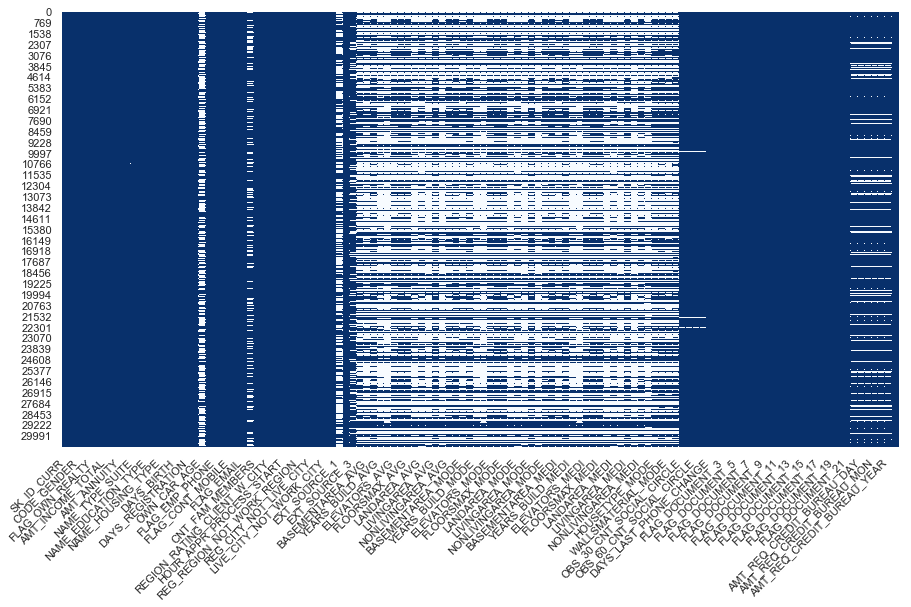

In [83]:
plot_missing_value(train, feature_alignment='vertical', return_df=True)

Terdapat beberapa kolom yang mengalami missing values, kolom yang persentase missing valuesnya 50% keatas akan kita hapus.

In [84]:
# drop data yang missing values pada masing-masing kolom
train.drop(columns=['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG',
                 'ENTRANCES_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG',
                 'APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMIN_MODE','LANDAREA_MODE',
                'LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BUILD_MEDI',
                'COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI',
                'NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE'], axis=1, inplace=True)

## Target

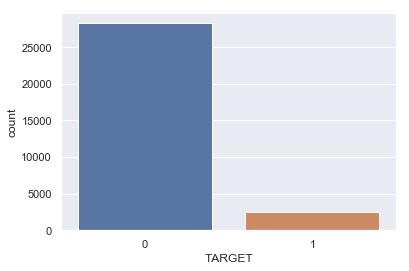

In [85]:
sns.countplot(train.TARGET);

In [86]:
train.TARGET.value_counts(normalize=True)

0    0.919257
1    0.080743
Name: TARGET, dtype: float64

Gunakan f1 score

## EDA Extensive

### Numeric vs Target

In [87]:
# filter fitur numerik dan kategorik
numeric = list(train.dtypes[train.dtypes != 'object'].index)
categoric = list(train.dtypes[train.dtypes == 'object'].index)

In [88]:
del numeric[1]

### Distplot

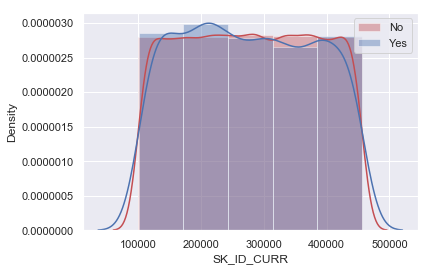

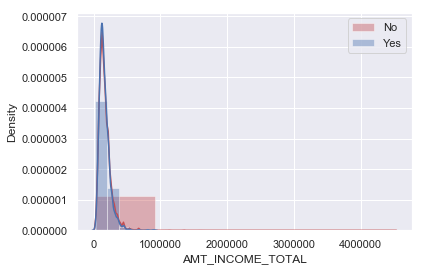

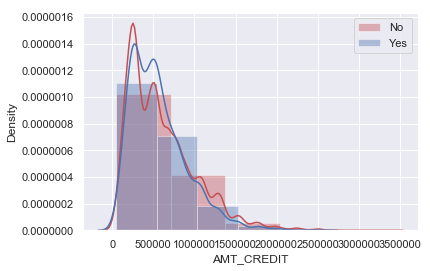

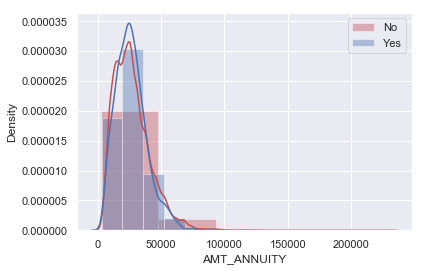

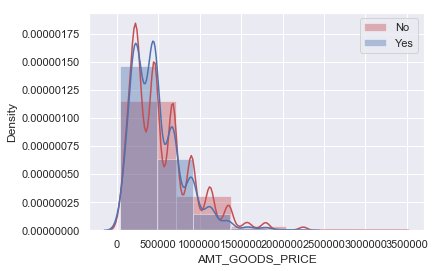

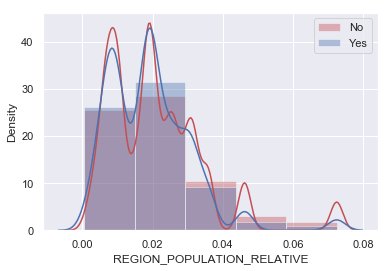

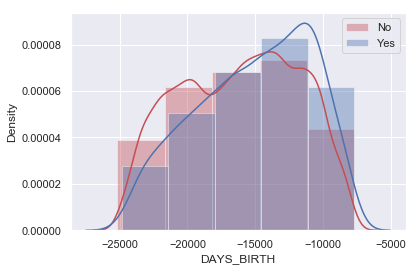

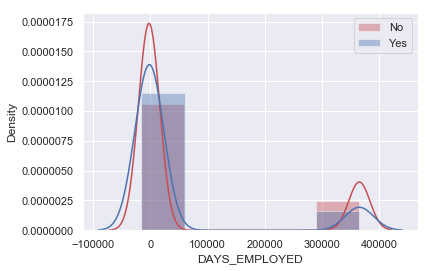

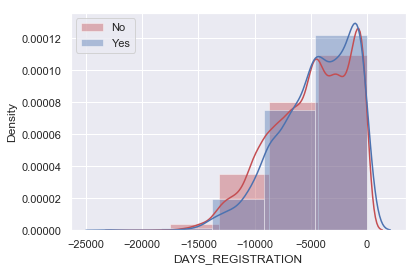

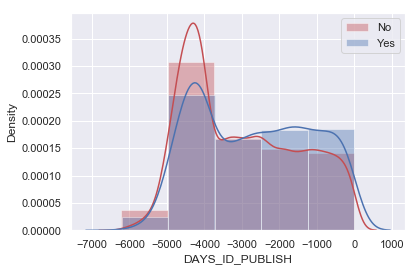

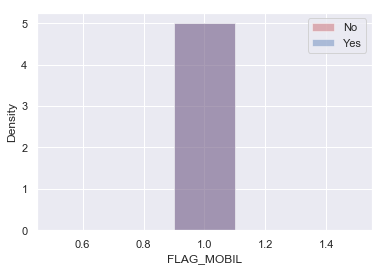

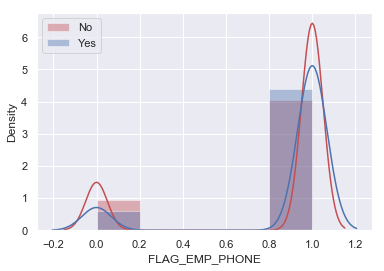

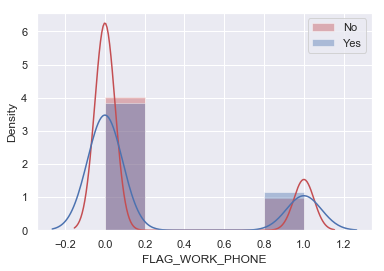

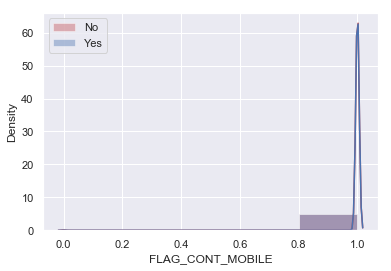

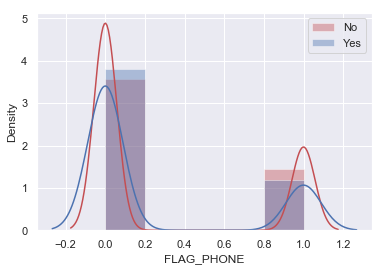

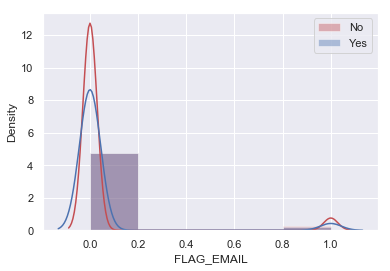

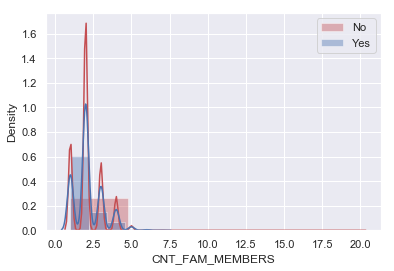

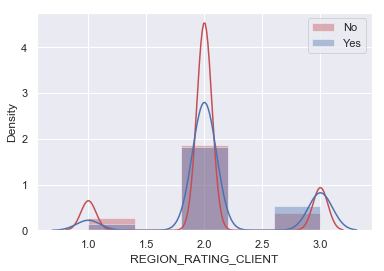

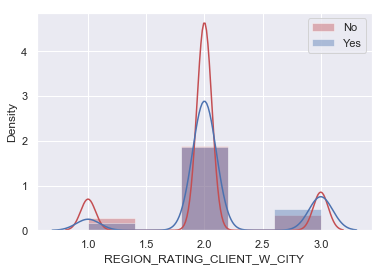

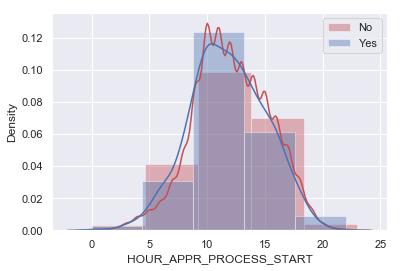

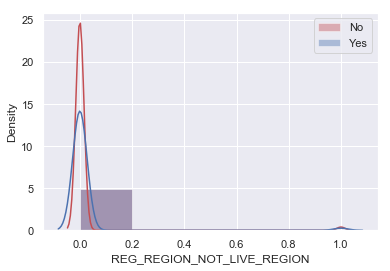

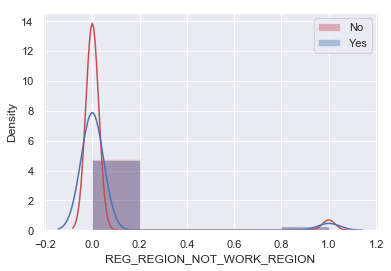

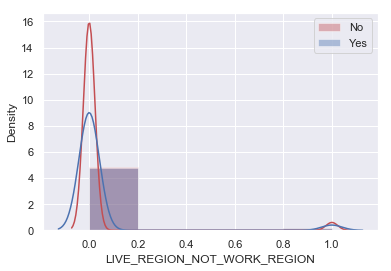

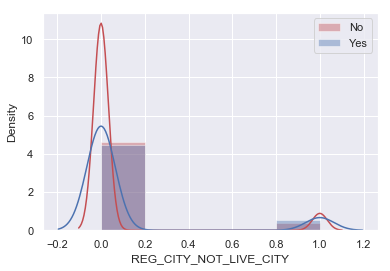

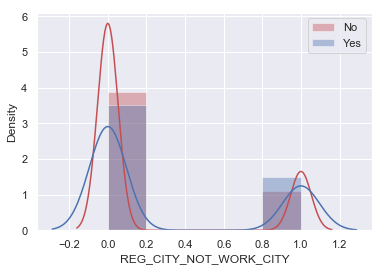

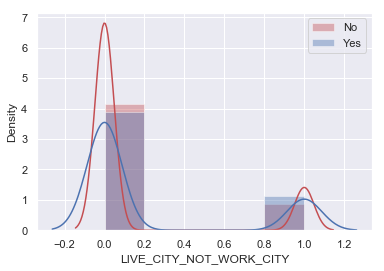

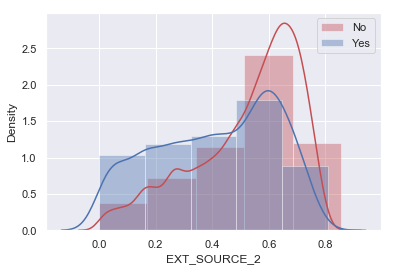

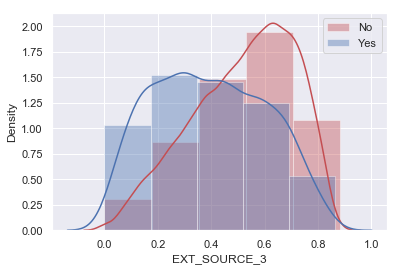

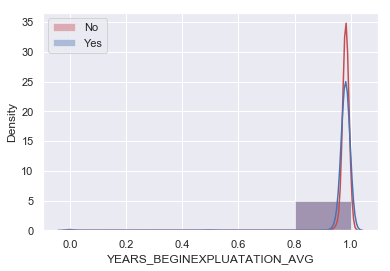

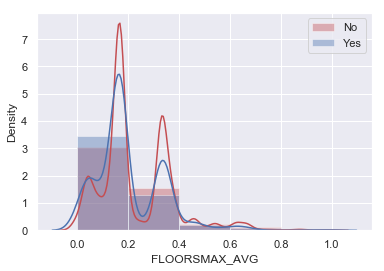

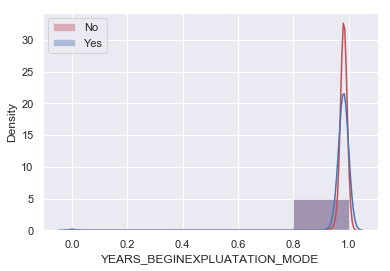

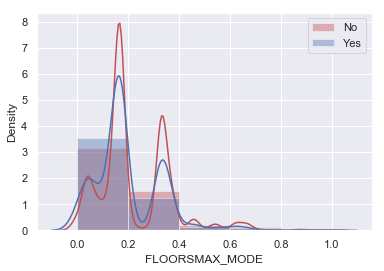

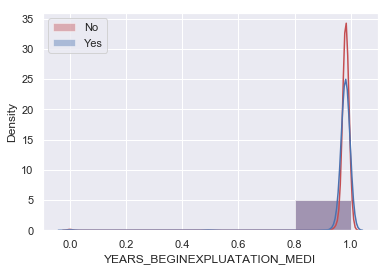

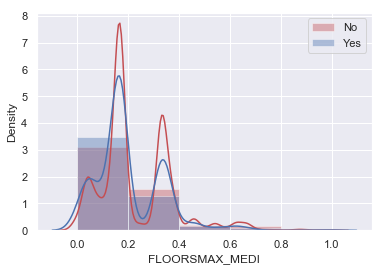

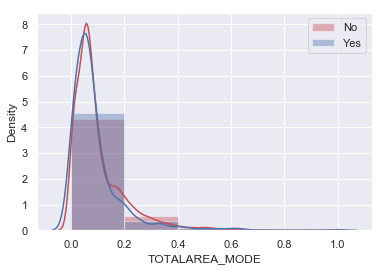

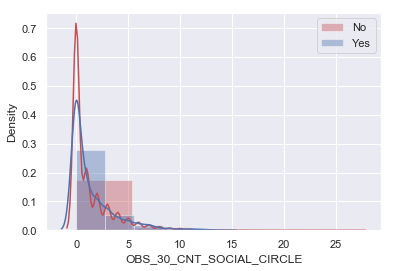

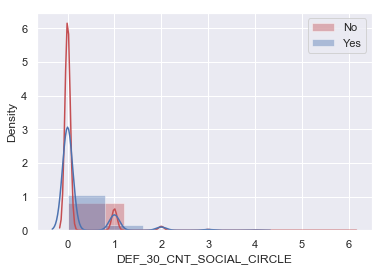

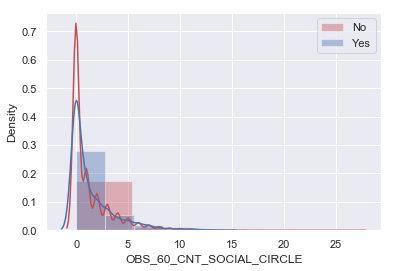

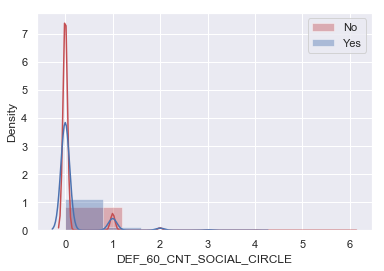

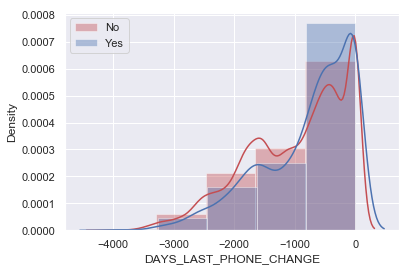

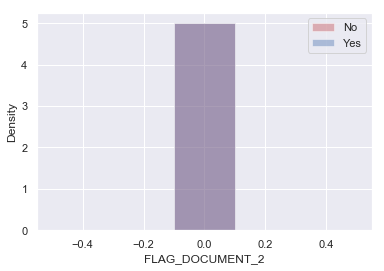

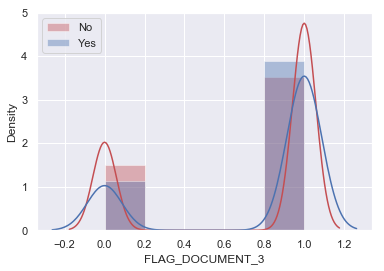

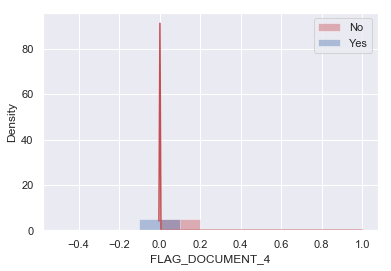

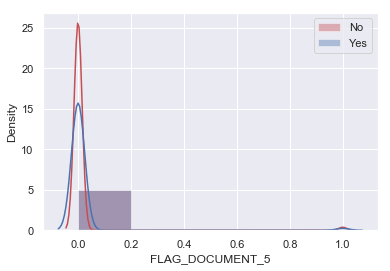

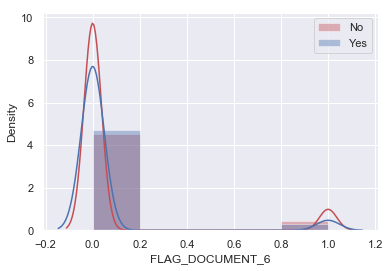

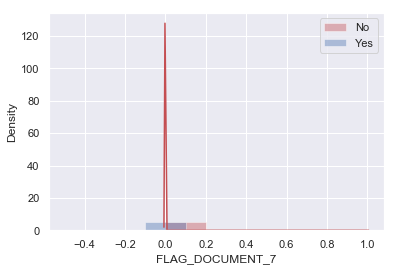

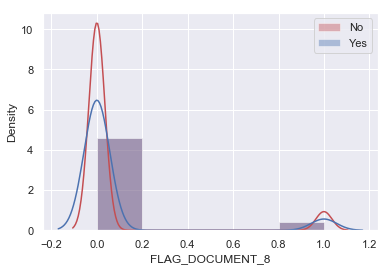

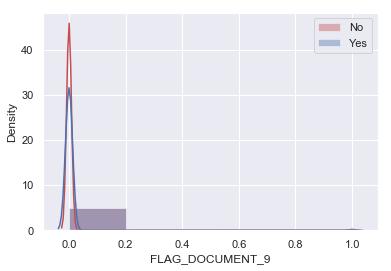

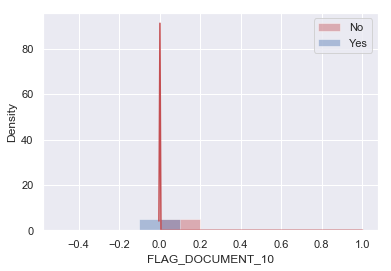

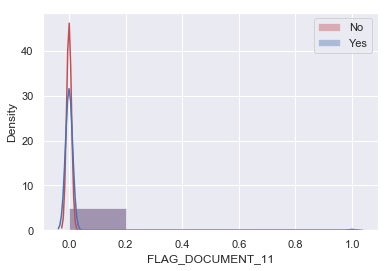

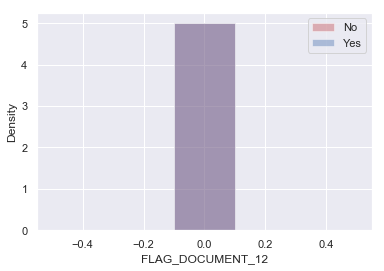

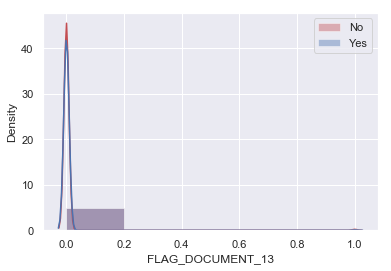

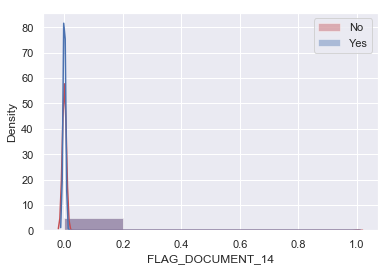

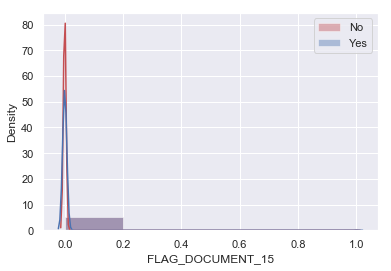

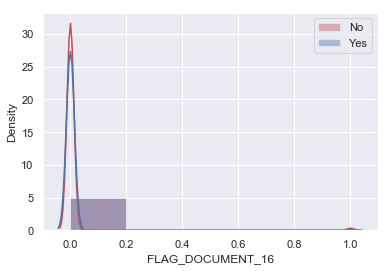

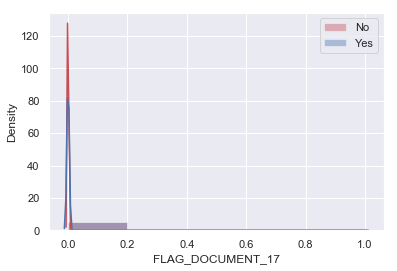

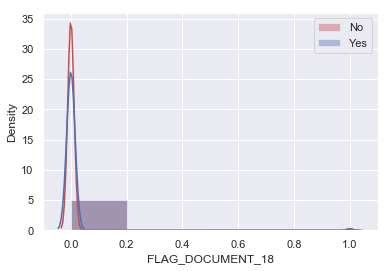

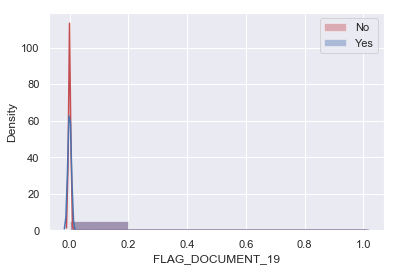

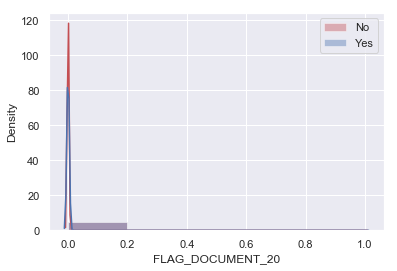

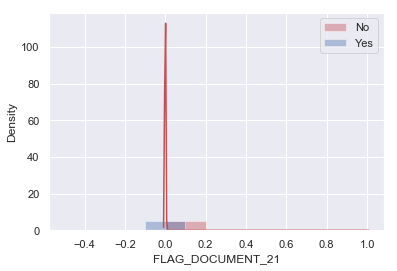

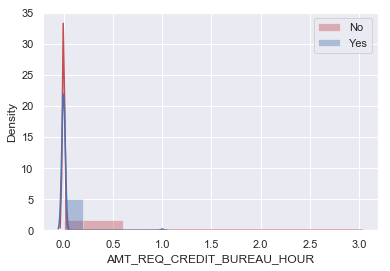

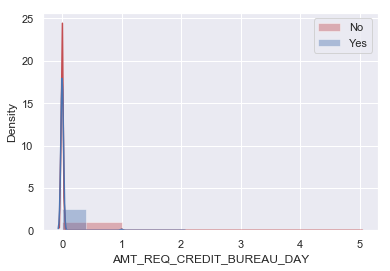

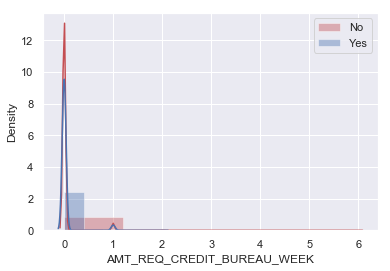

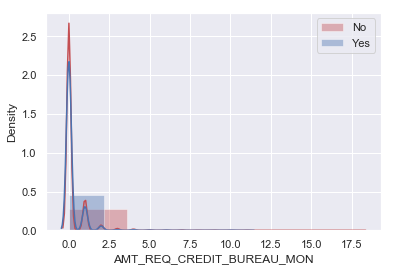

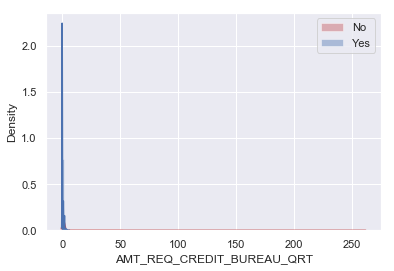

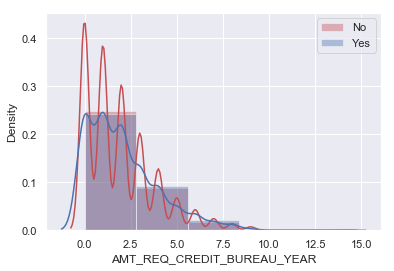

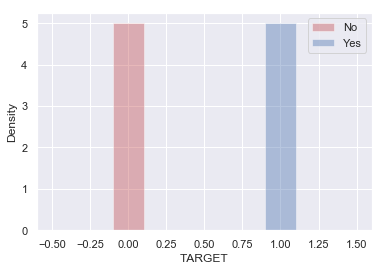

In [89]:
for features in numeric:
    sns.distplot(train[features][train.TARGET == 0], bins=5, label='No', color='r')
    sns.distplot(train[features][train.TARGET == 1], bins=5, label='Yes', color='b')
    plt.legend()
    plt.show()

### Boxplot

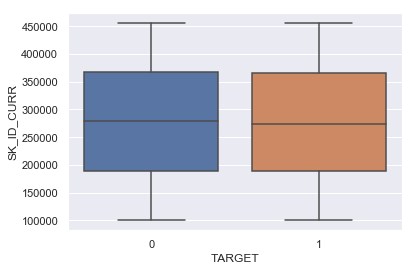

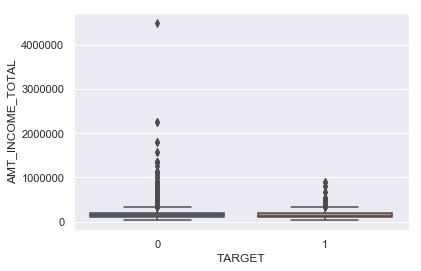

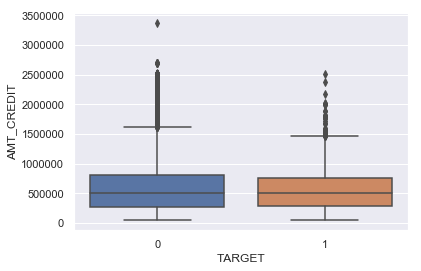

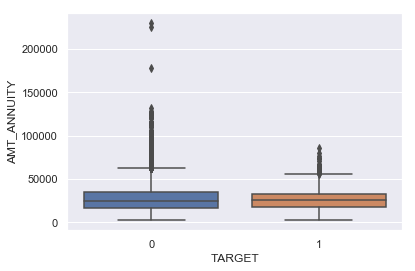

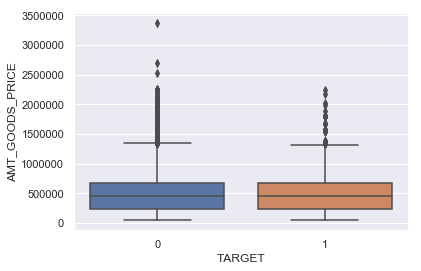

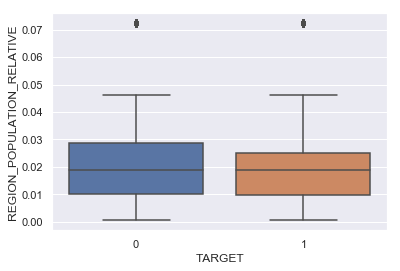

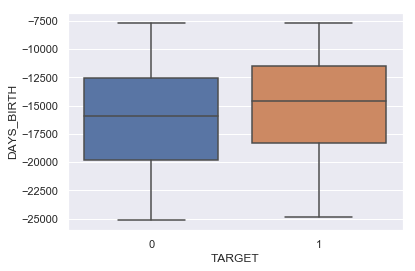

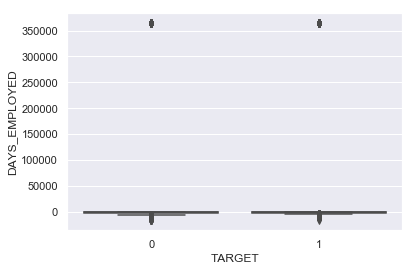

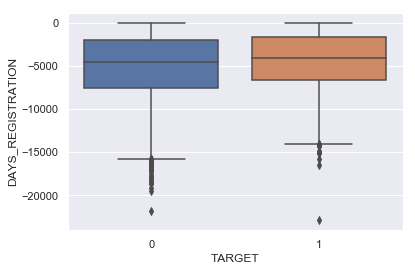

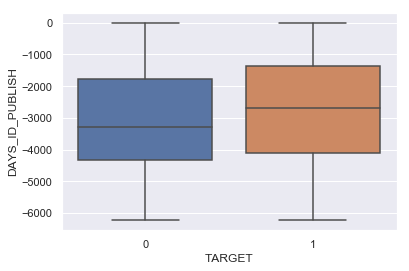

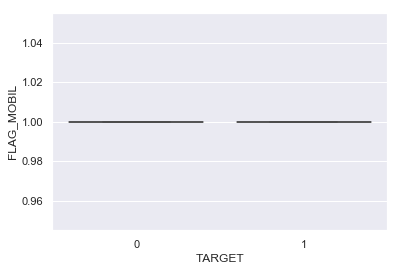

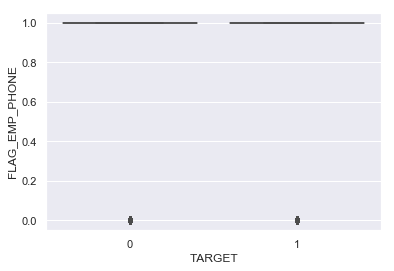

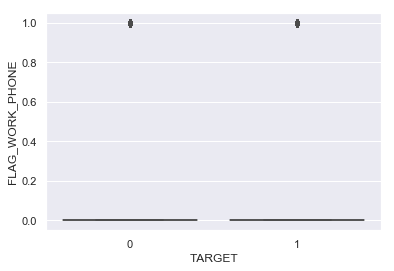

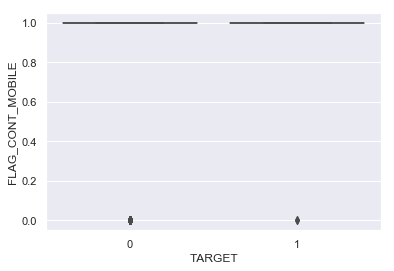

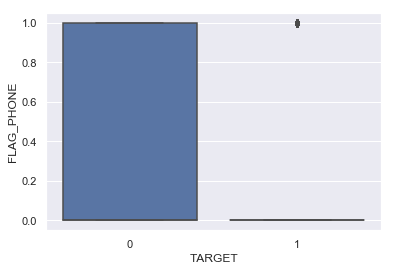

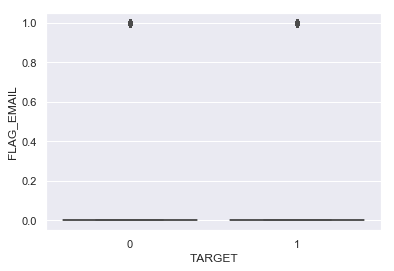

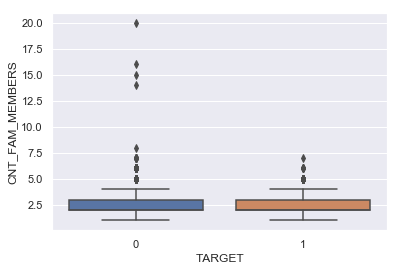

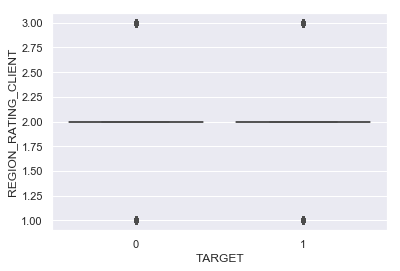

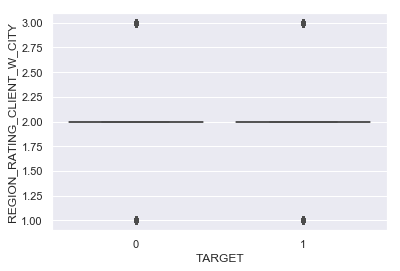

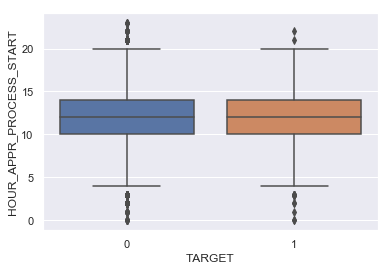

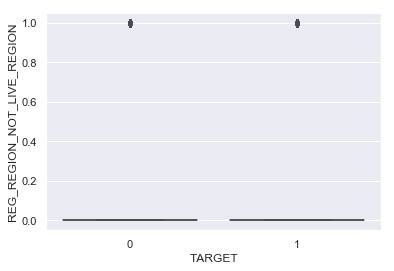

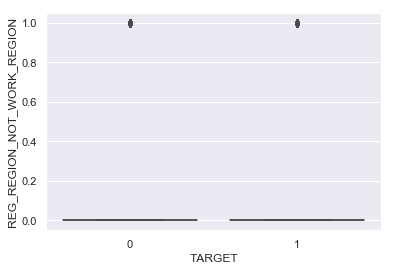

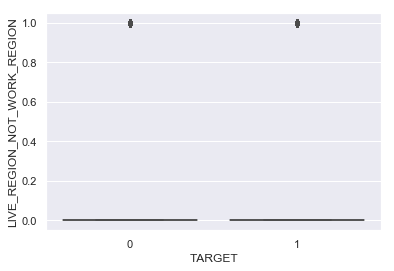

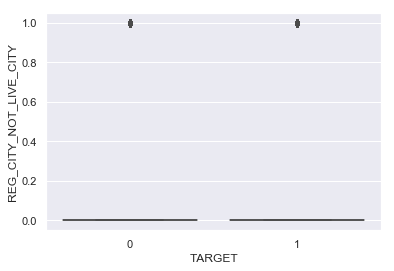

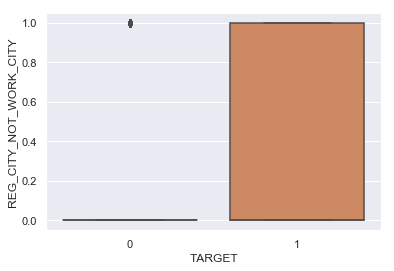

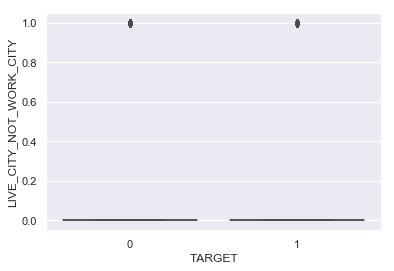

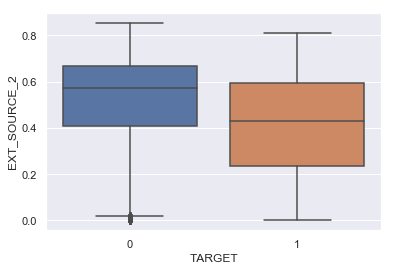

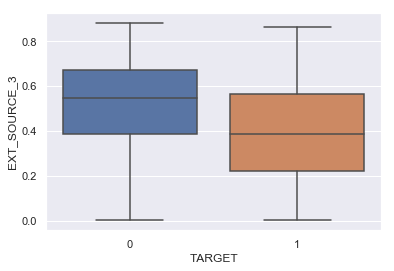

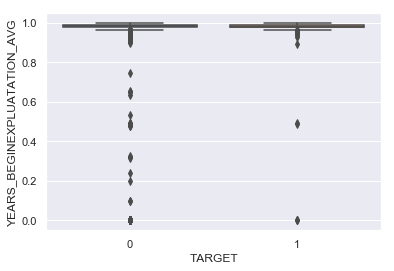

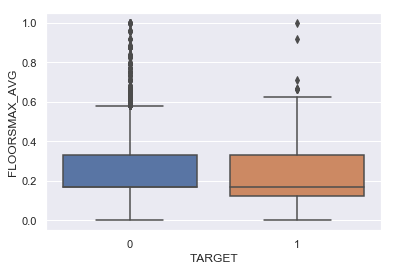

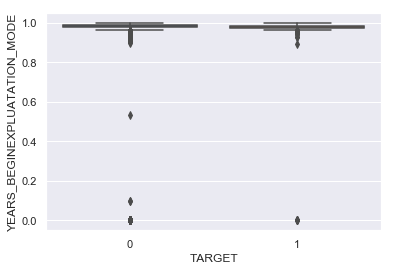

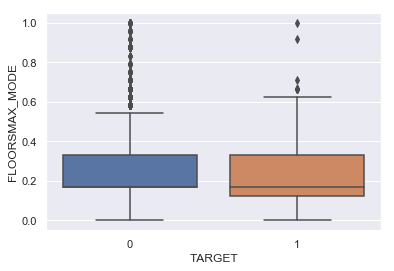

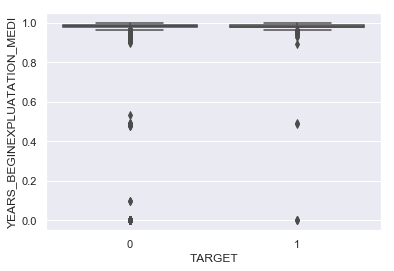

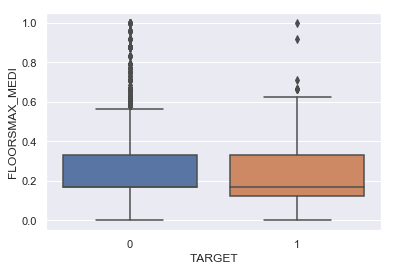

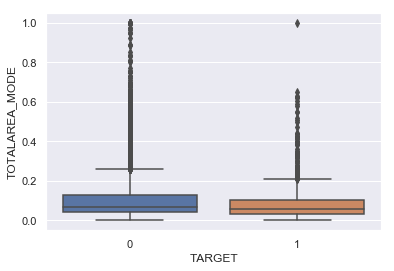

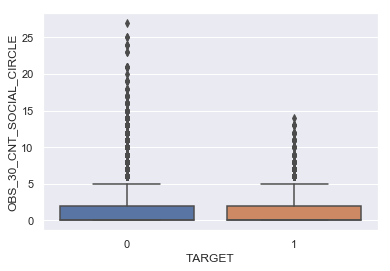

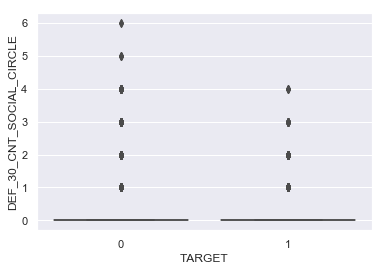

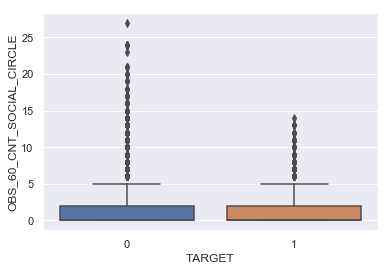

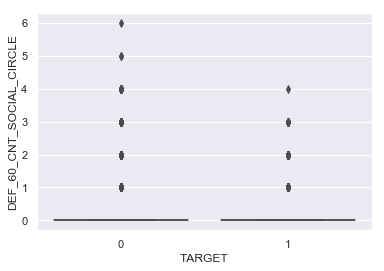

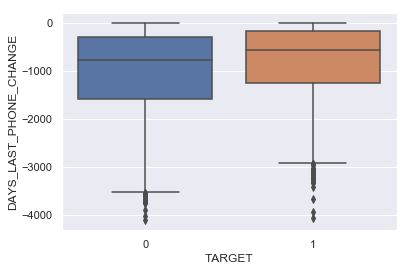

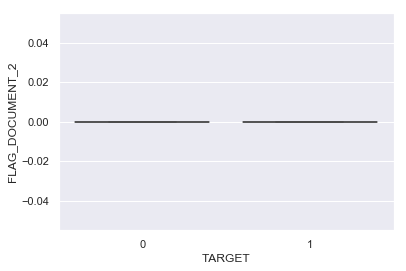

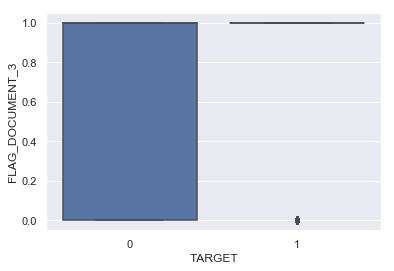

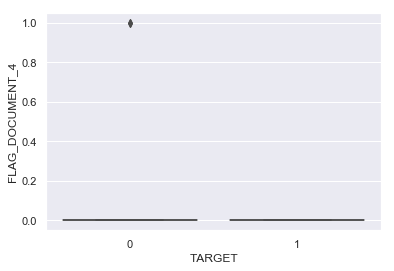

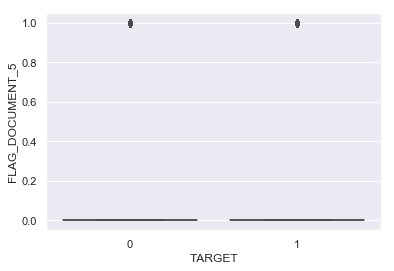

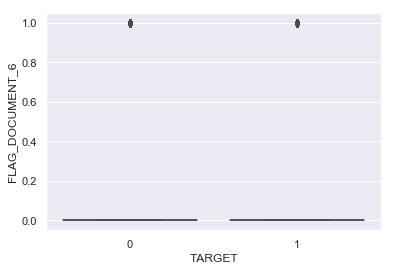

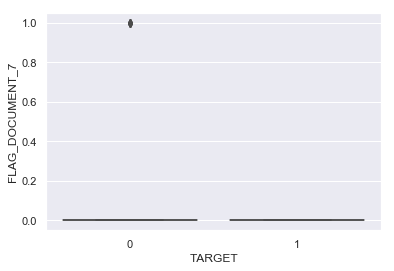

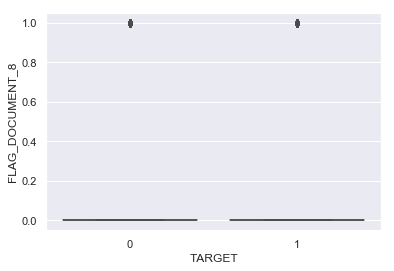

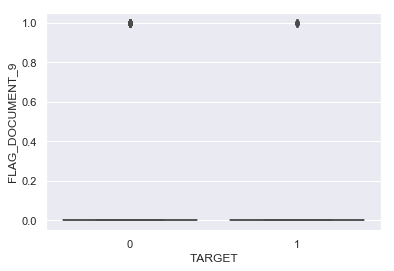

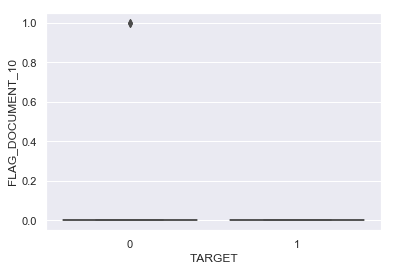

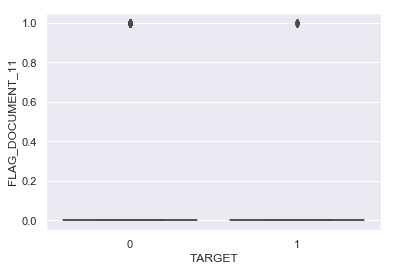

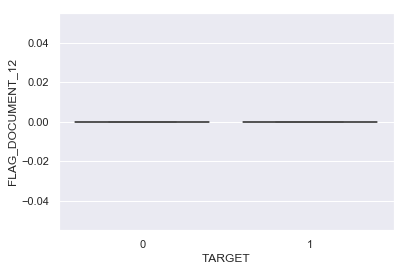

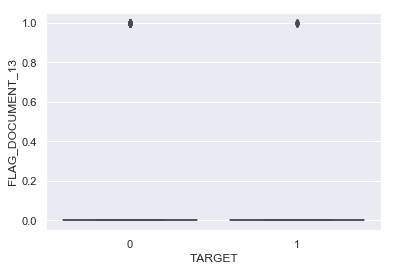

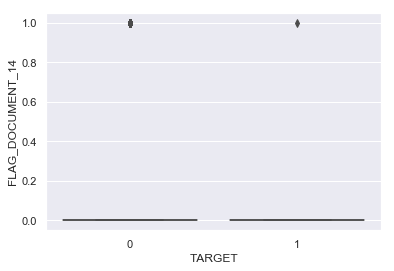

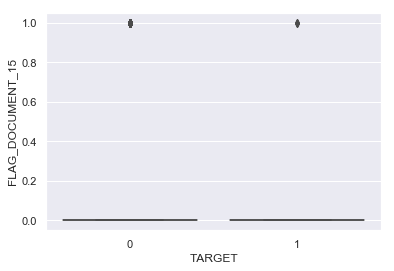

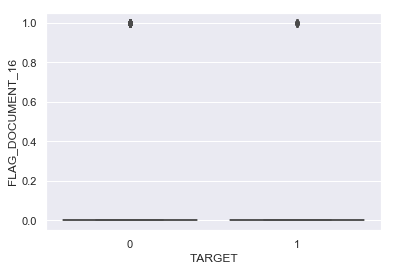

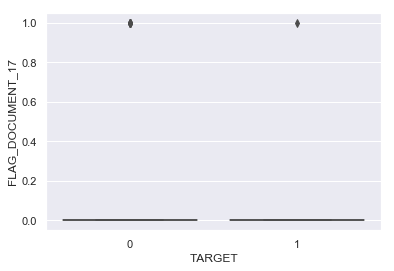

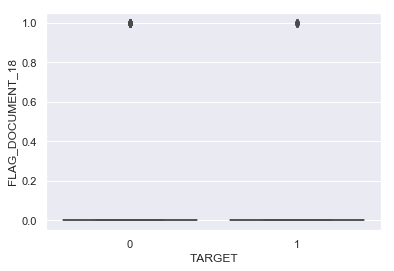

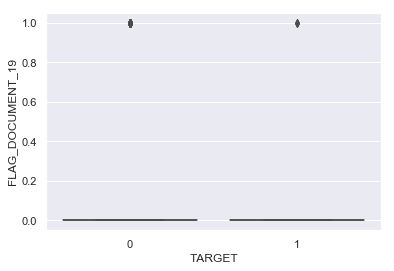

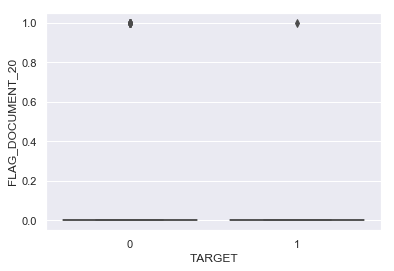

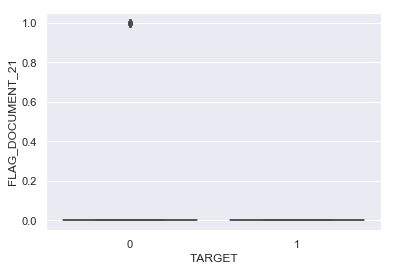

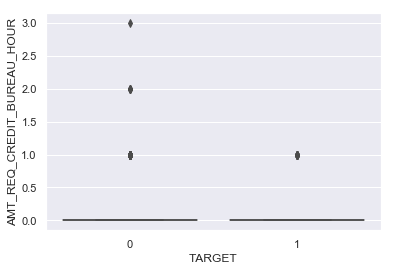

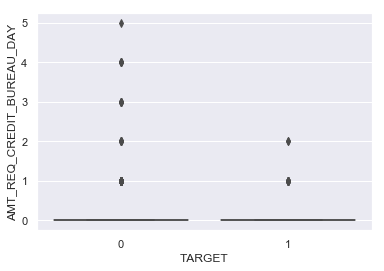

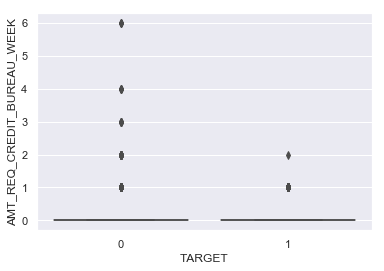

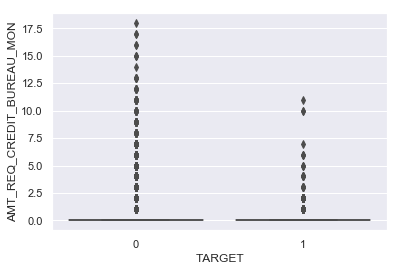

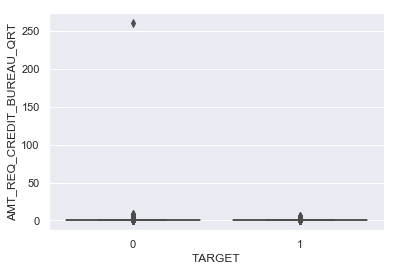

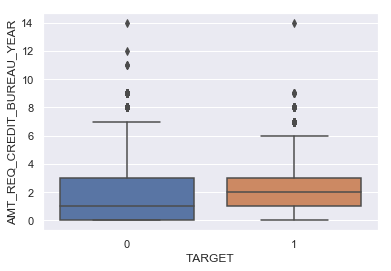

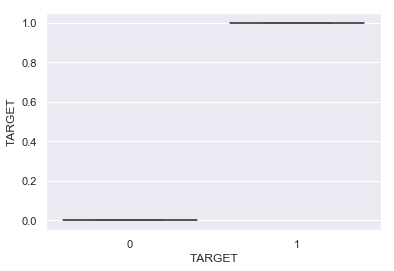

In [90]:
for features in numeric:
    sns.boxplot(x='TARGET', y=train[features], data=train)
    plt.show()

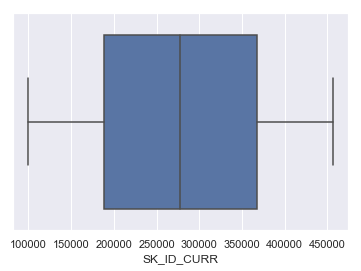

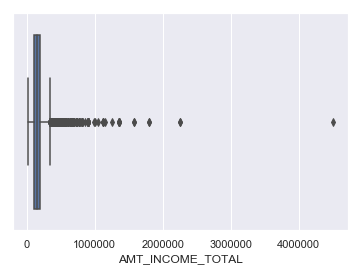

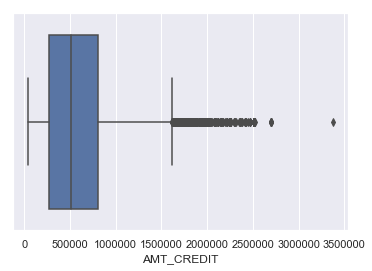

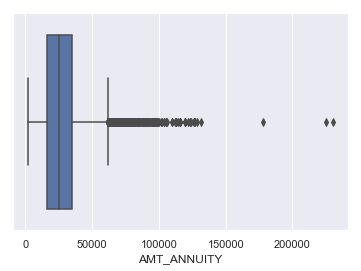

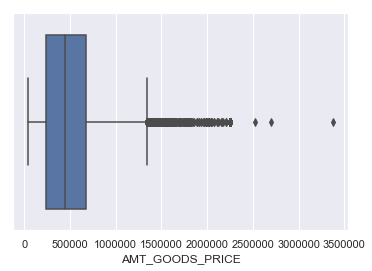

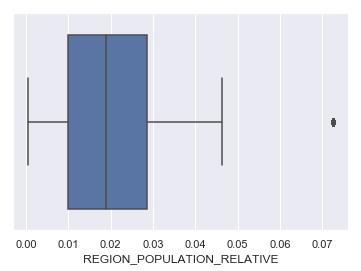

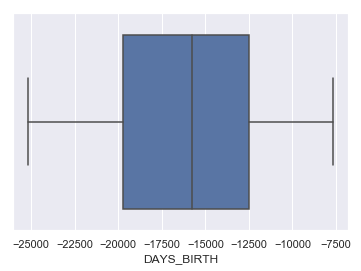

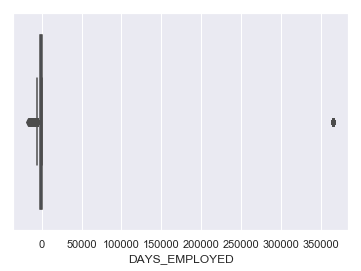

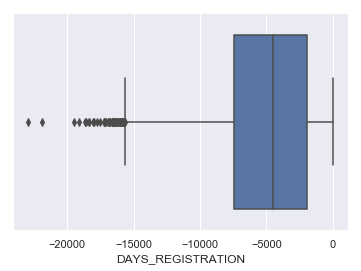

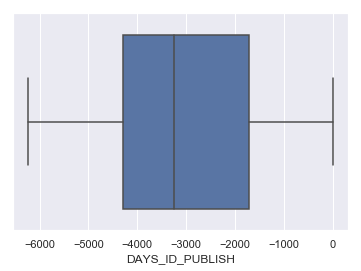

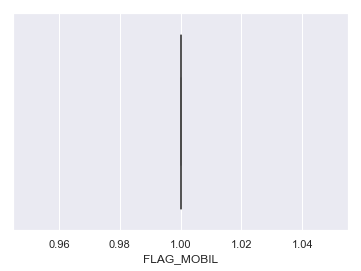

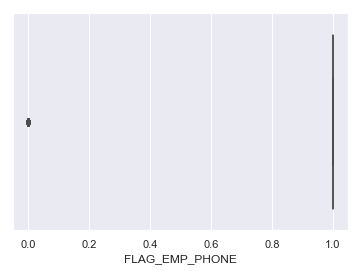

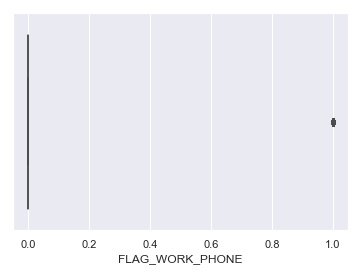

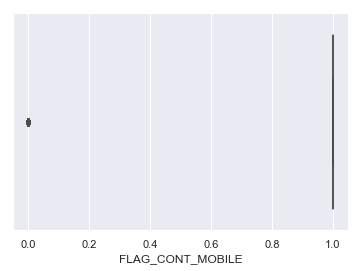

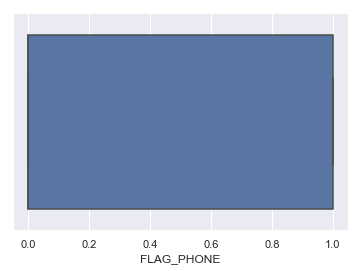

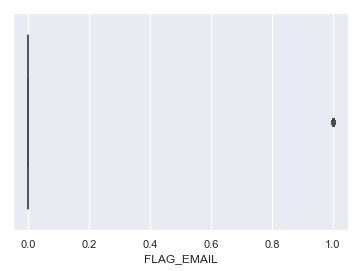

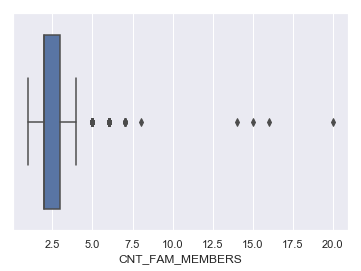

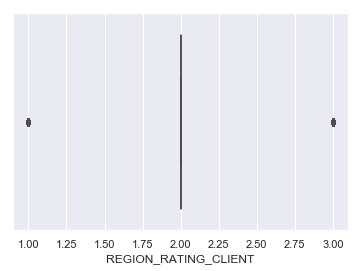

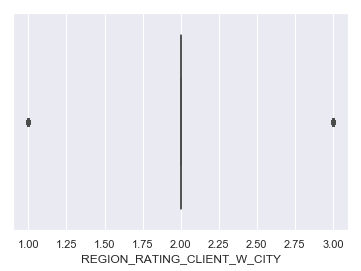

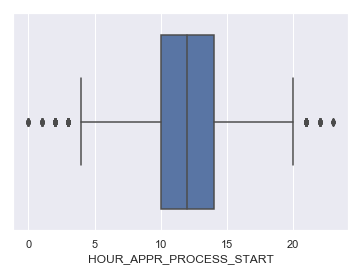

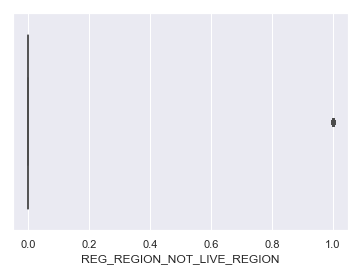

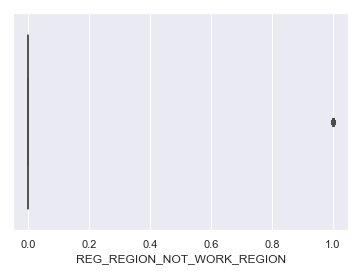

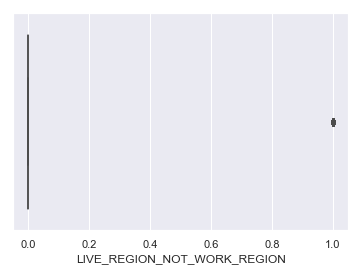

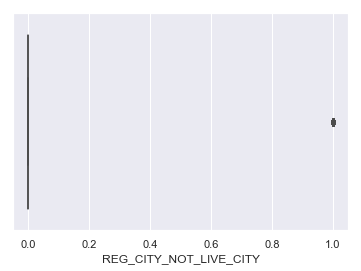

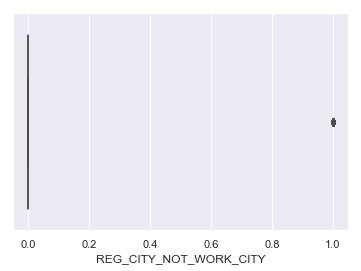

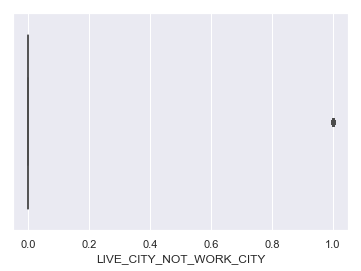

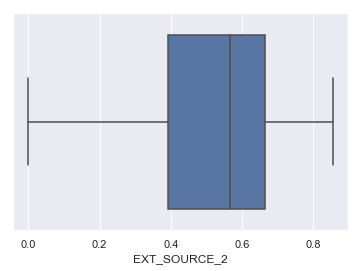

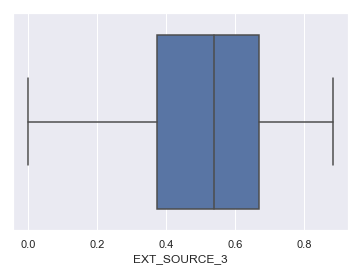

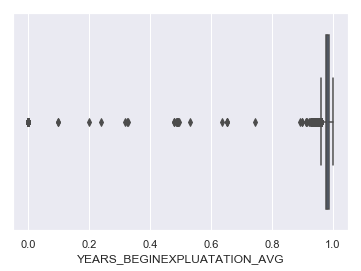

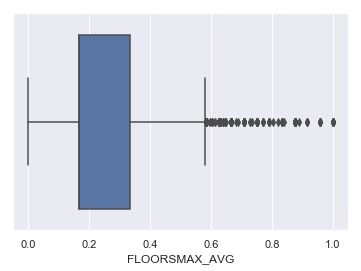

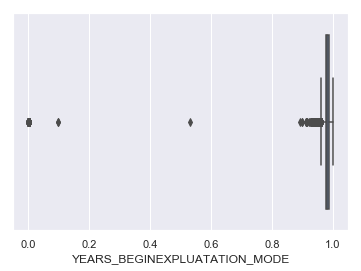

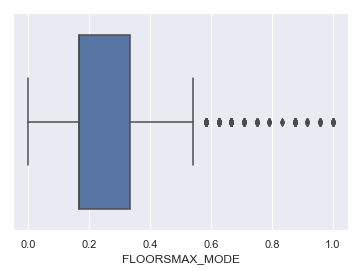

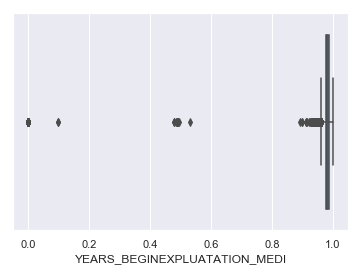

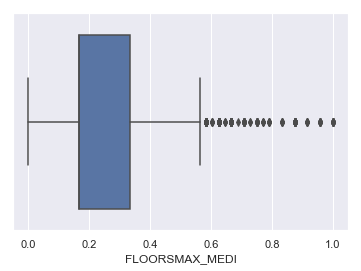

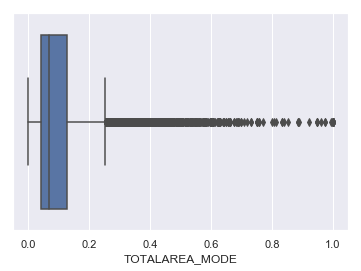

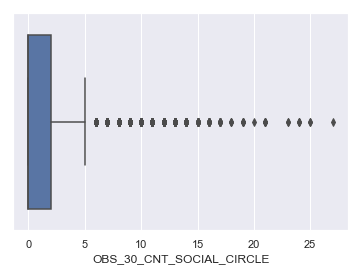

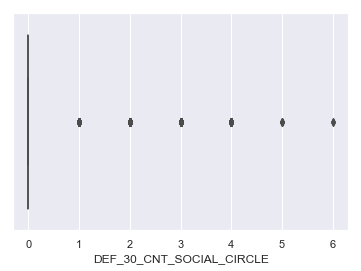

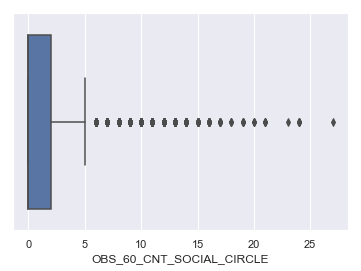

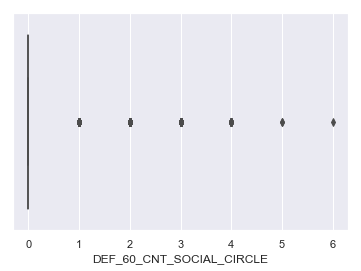

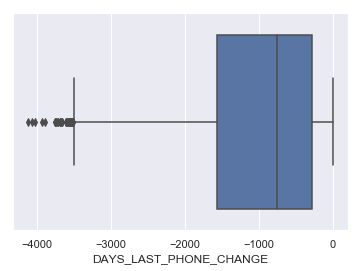

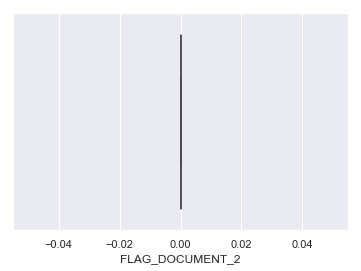

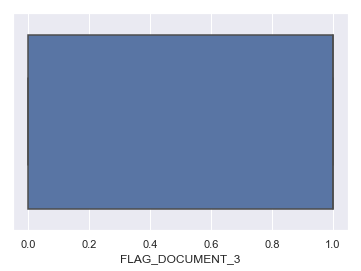

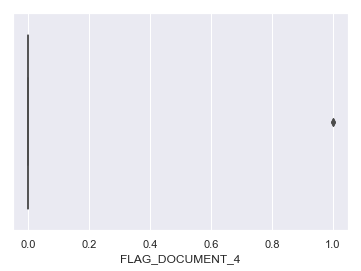

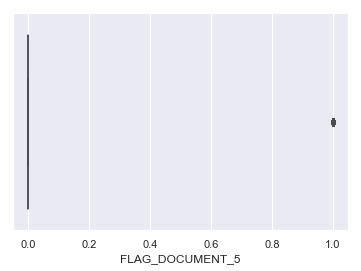

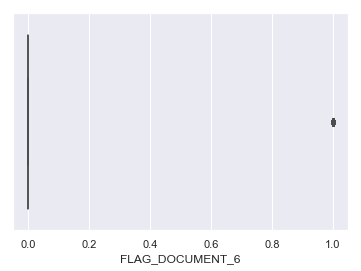

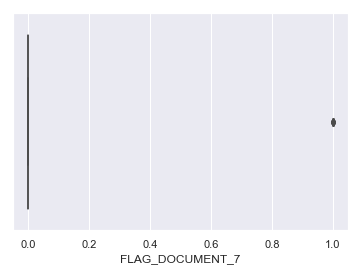

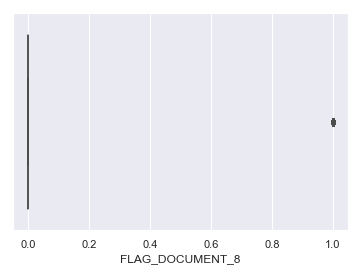

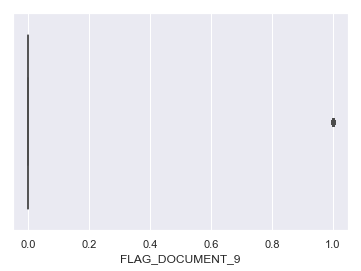

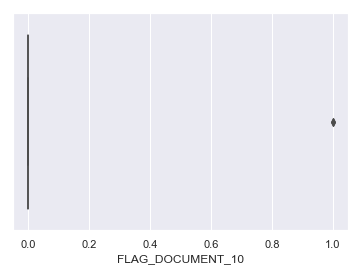

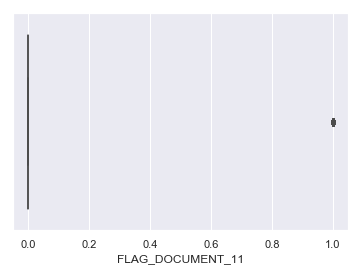

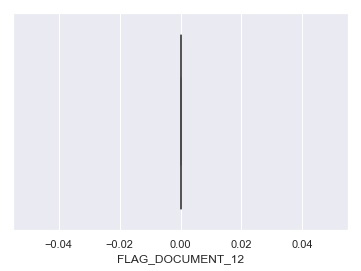

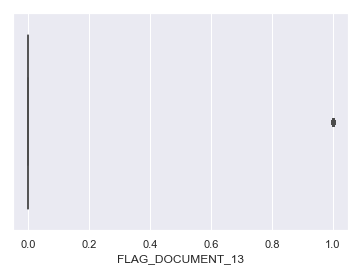

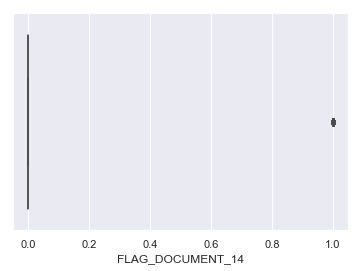

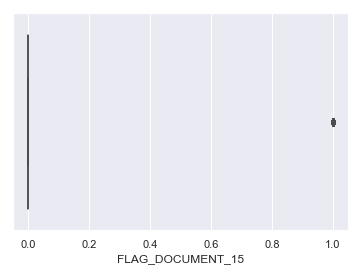

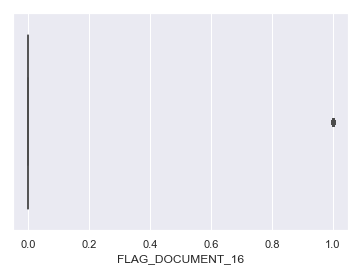

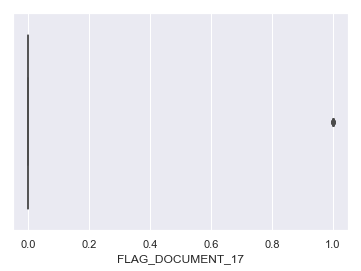

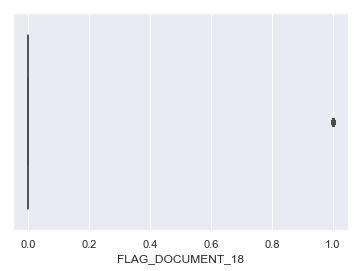

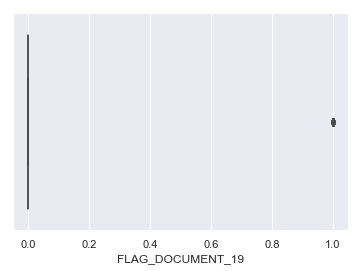

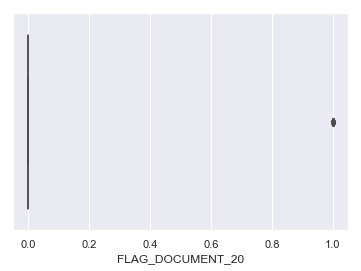

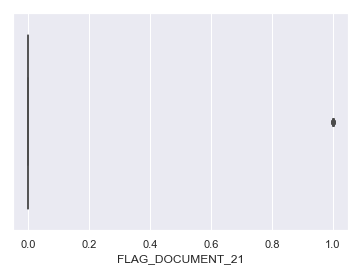

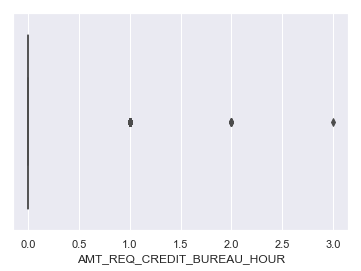

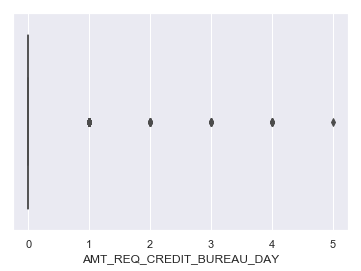

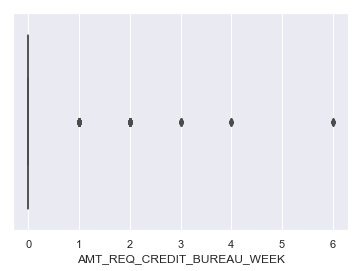

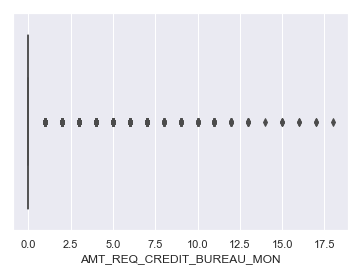

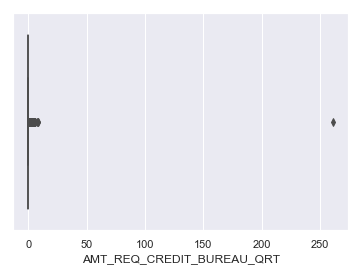

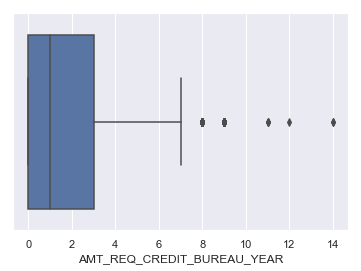

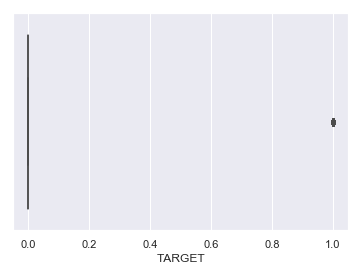

In [91]:
for features in numeric:
    sns.boxplot(train[features], data=train)
    plt.show()

### Categoric vs Target

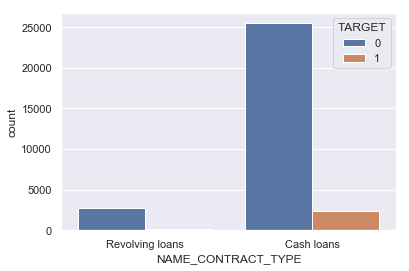

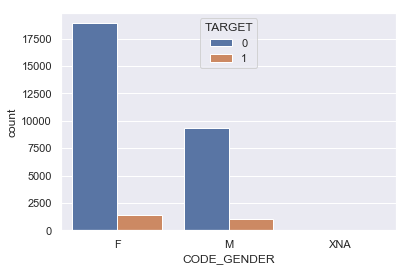

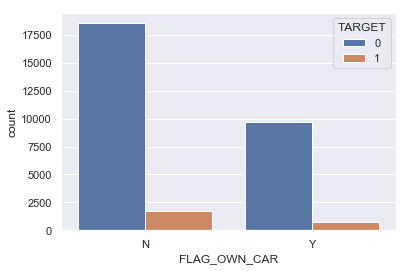

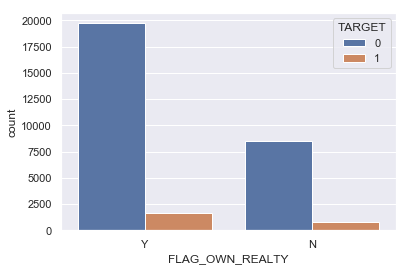

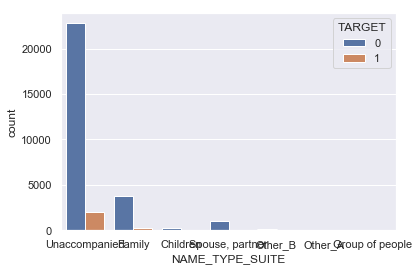

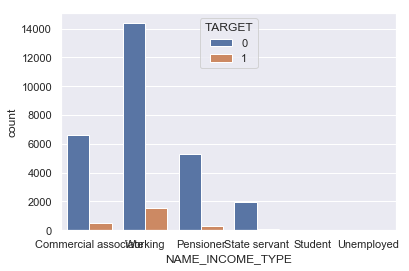

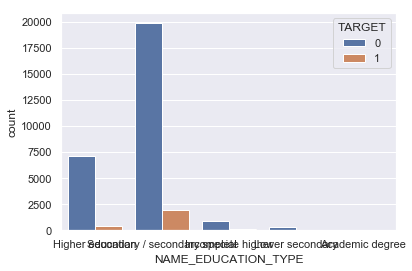

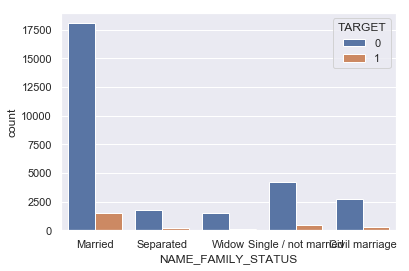

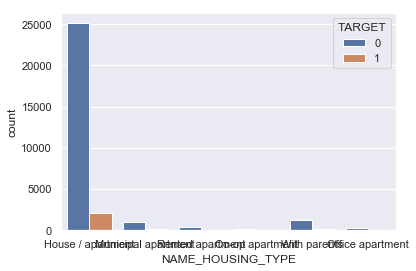

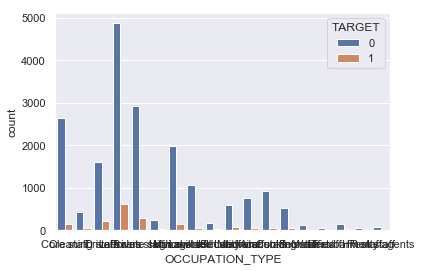

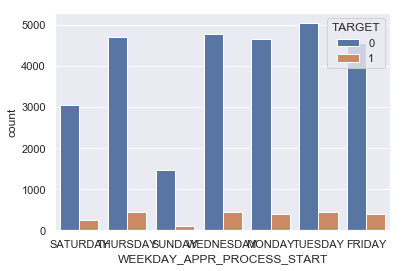

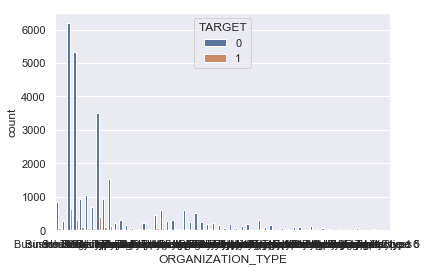

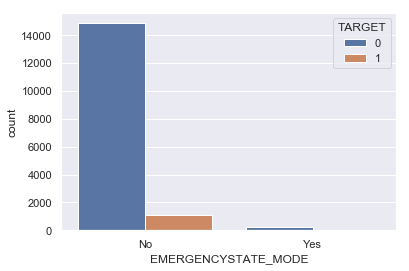

In [92]:
categoric = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
             'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']

for features in categoric:
    sns.countplot(train[features], hue='TARGET', data=train)
    plt.show()

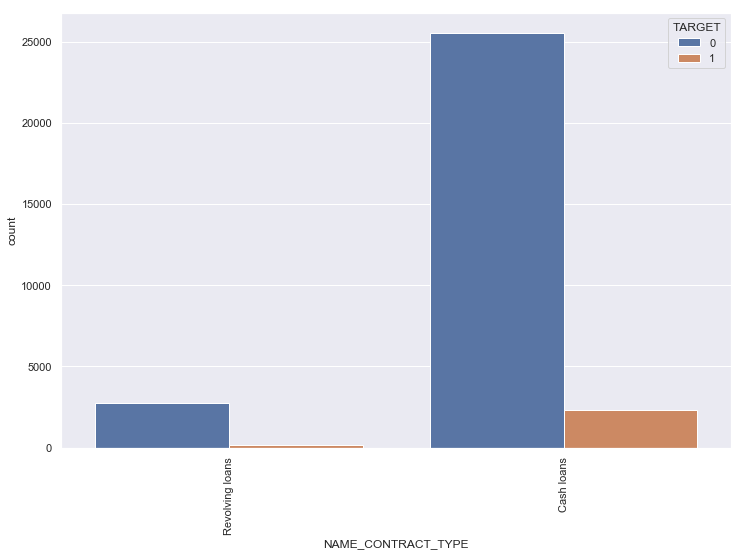

In [93]:
plt.figure(figsize=(12, 8))
plot = sns.countplot(train.NAME_CONTRACT_TYPE, hue='TARGET', data=train)
plt.setp(plot.get_xticklabels(), rotation=90);

### Categoric vs Numeric

### Barplot

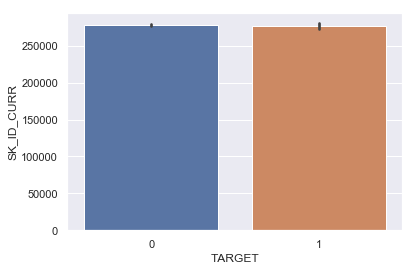

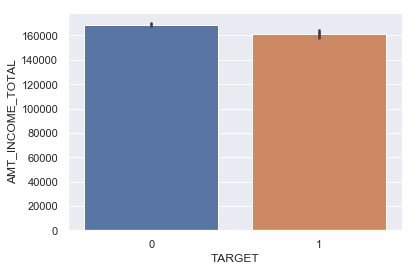

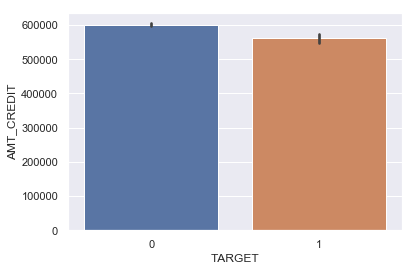

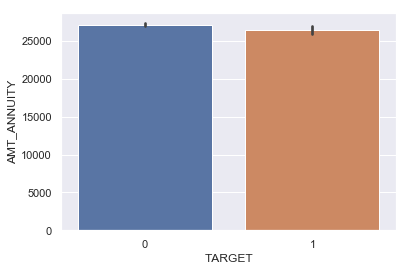

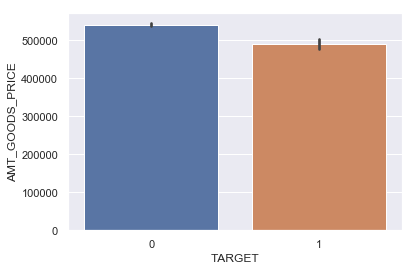

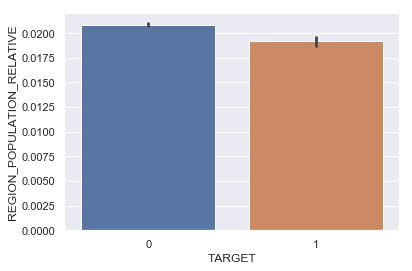

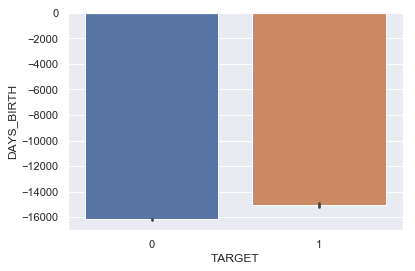

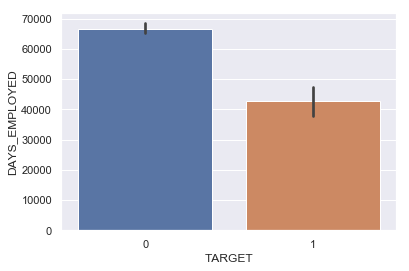

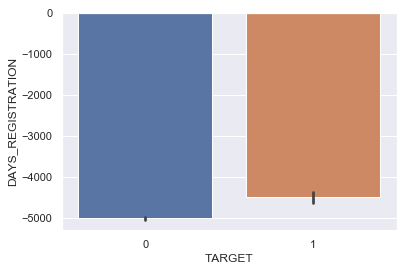

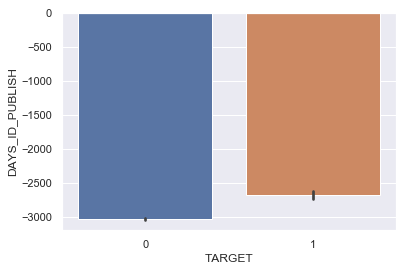

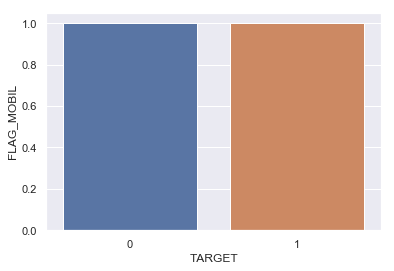

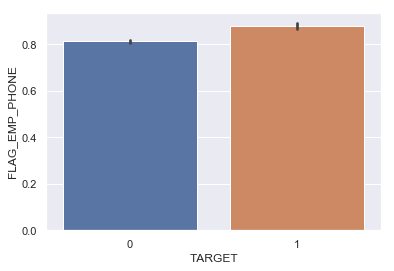

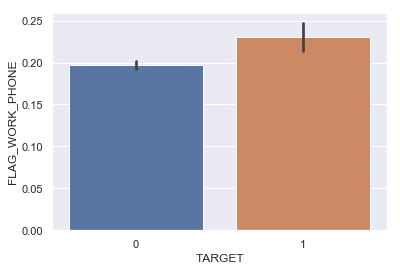

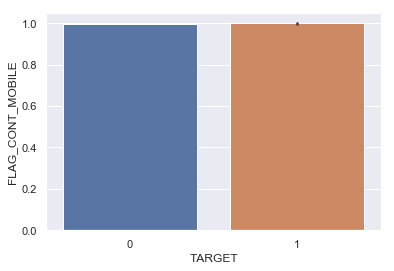

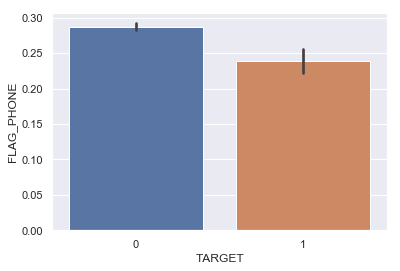

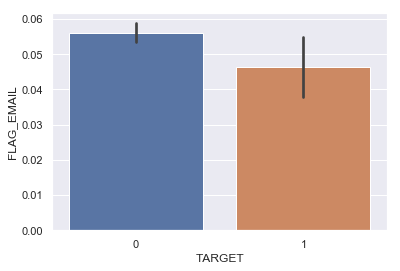

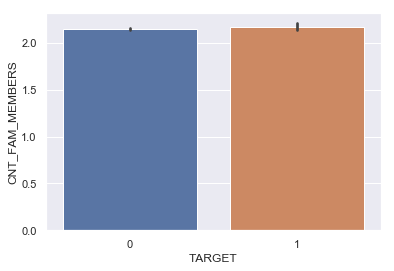

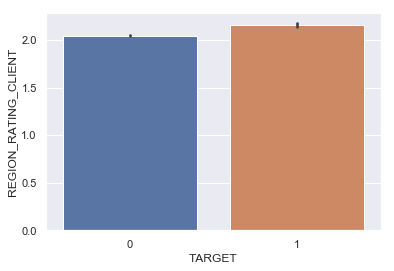

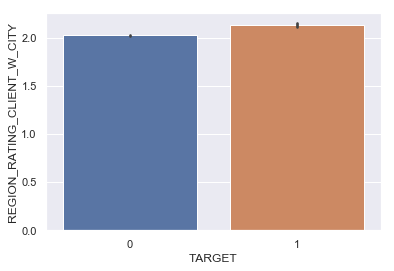

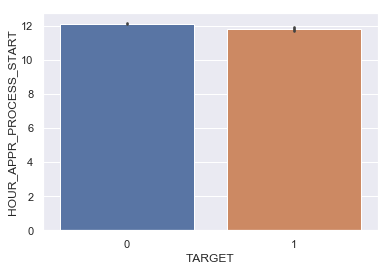

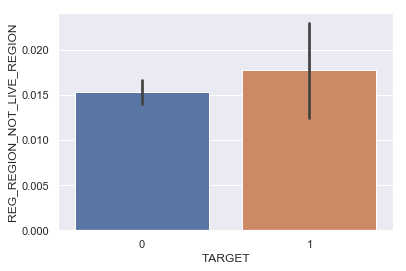

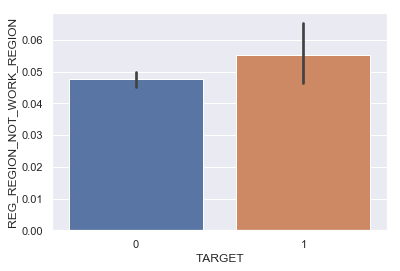

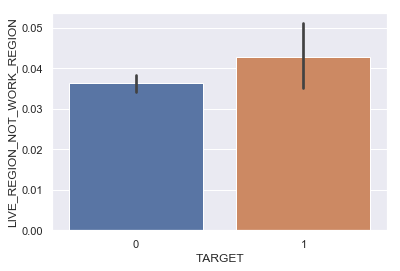

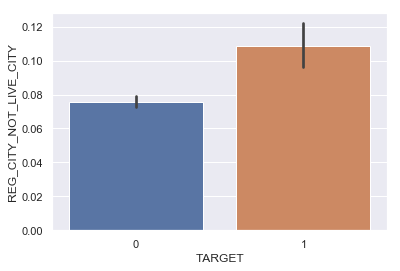

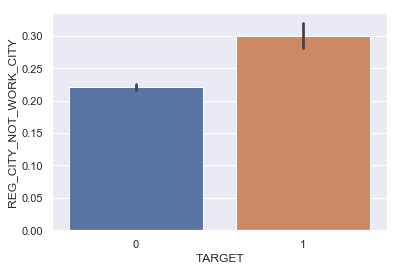

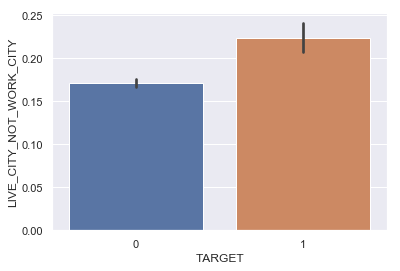

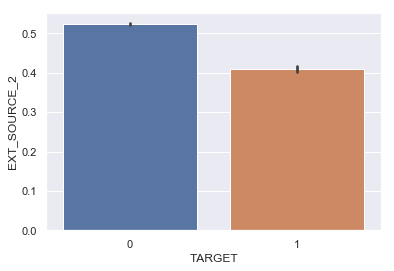

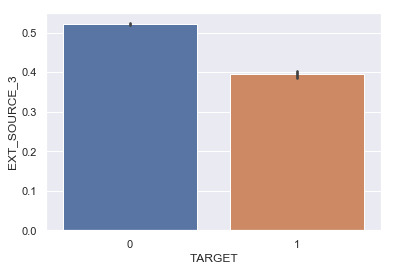

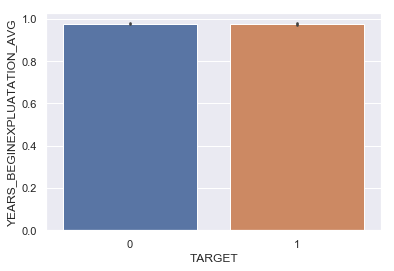

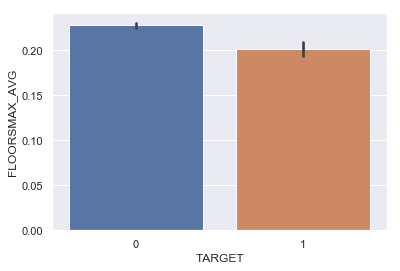

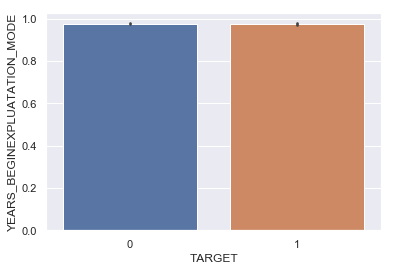

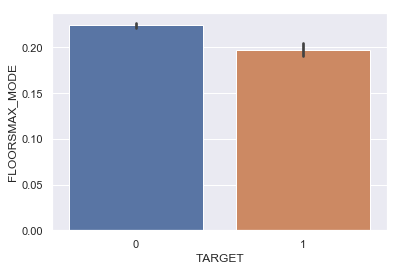

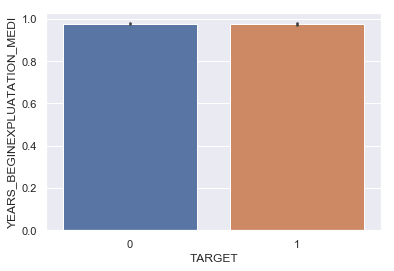

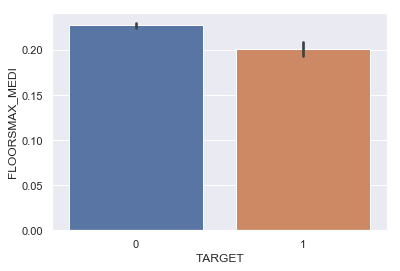

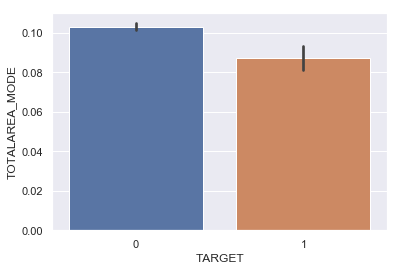

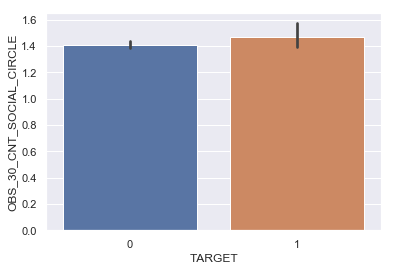

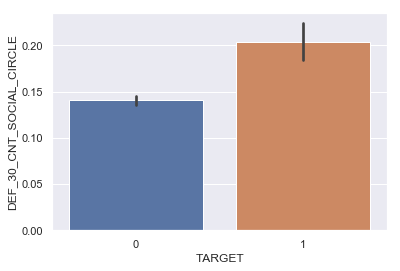

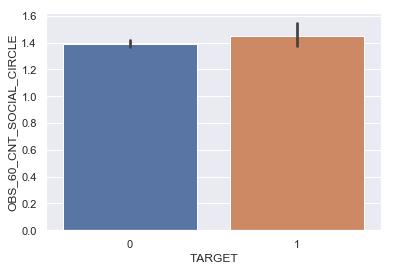

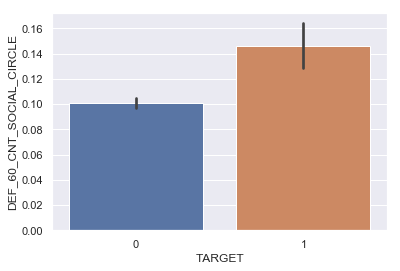

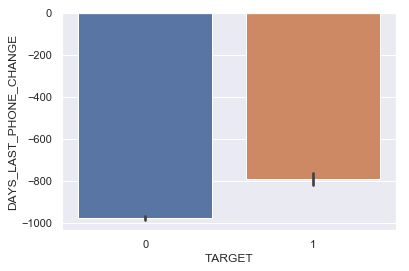

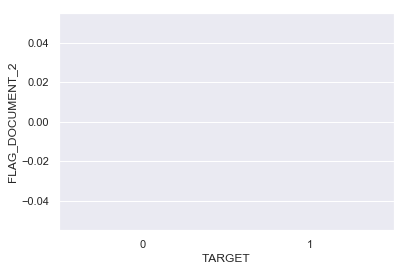

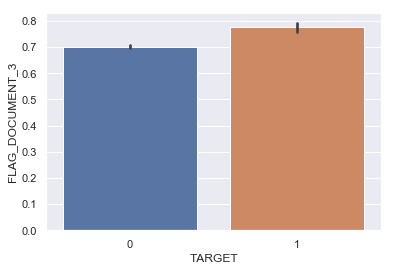

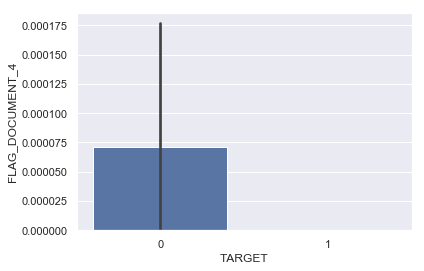

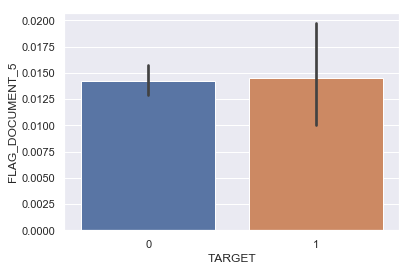

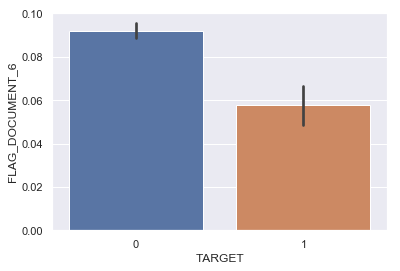

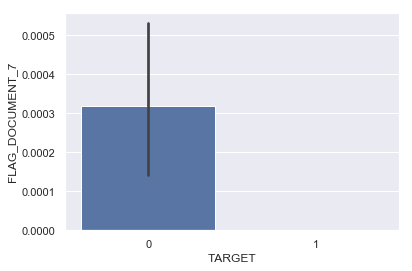

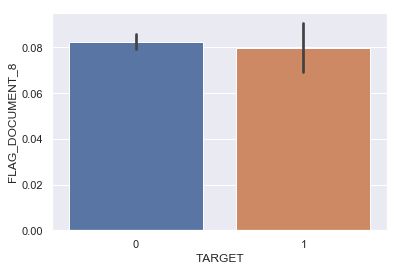

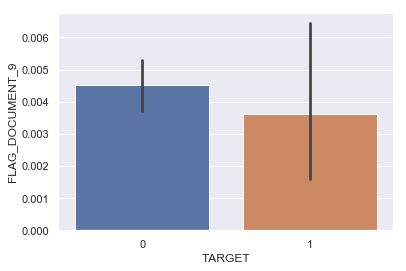

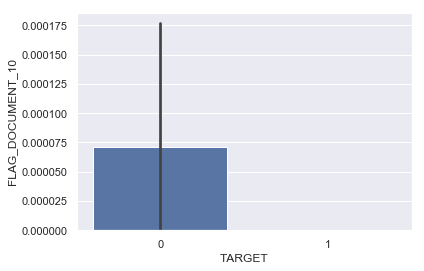

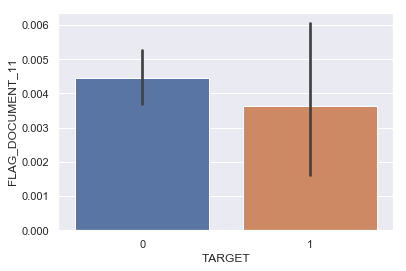

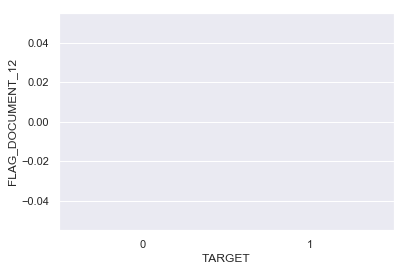

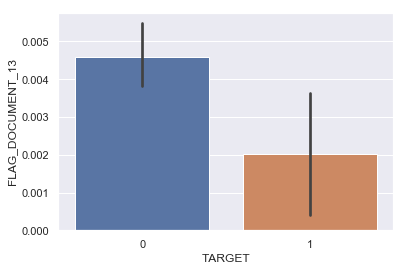

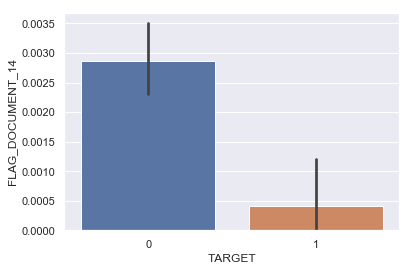

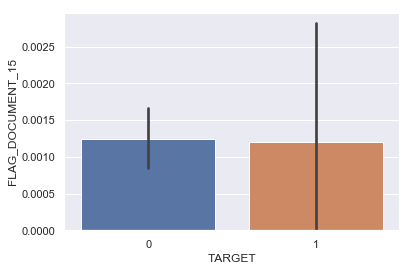

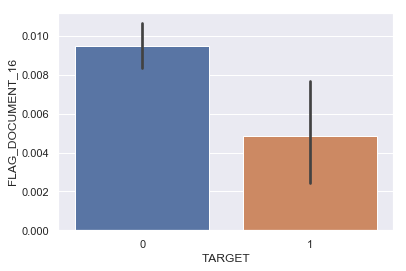

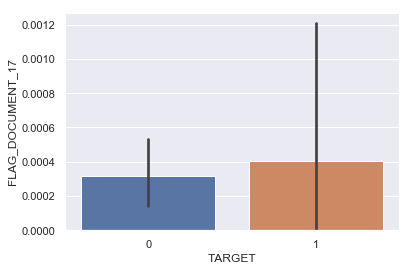

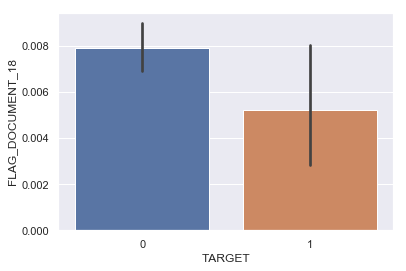

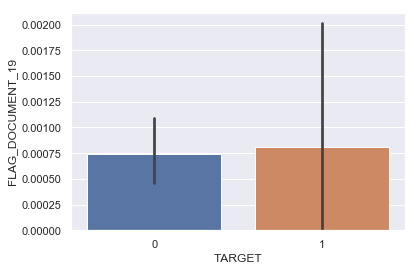

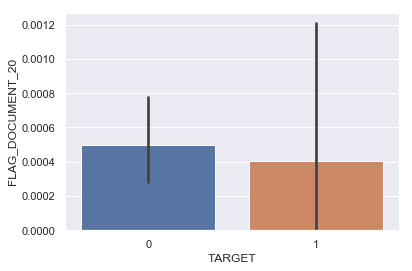

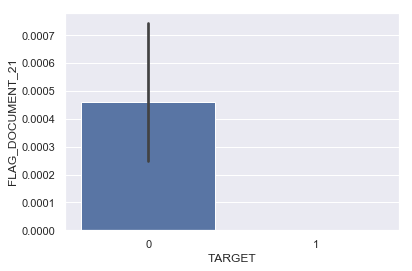

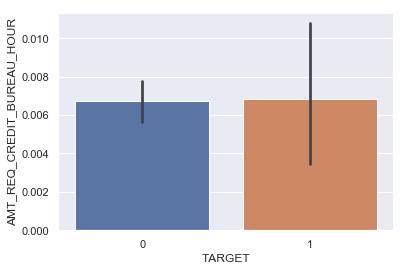

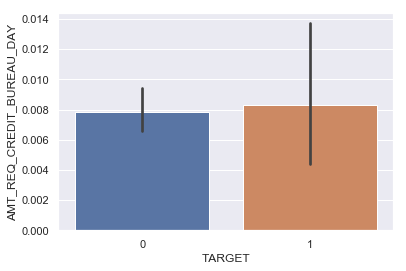

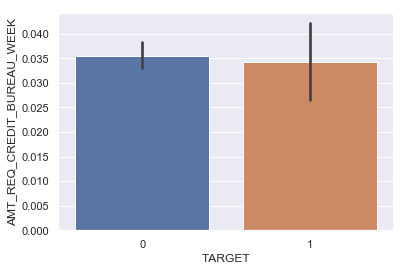

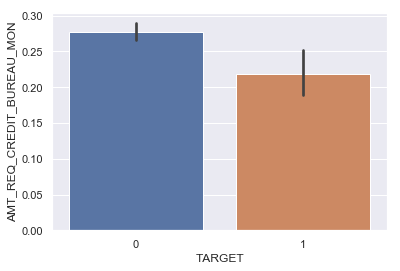

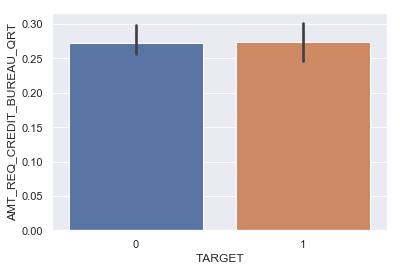

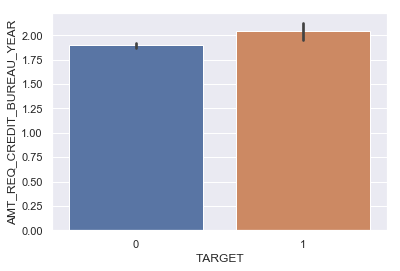

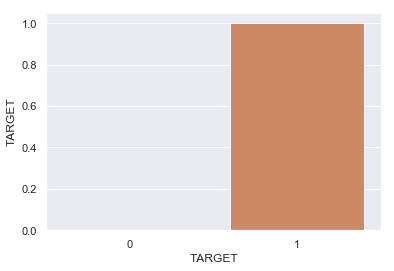

In [94]:
for features in numeric:
    sns.barplot(x='TARGET', y=train[features], data=train)
    plt.show()

### Boxplot

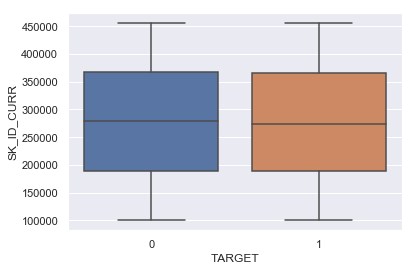

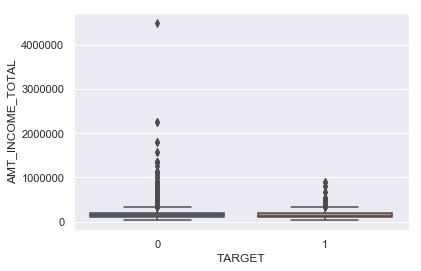

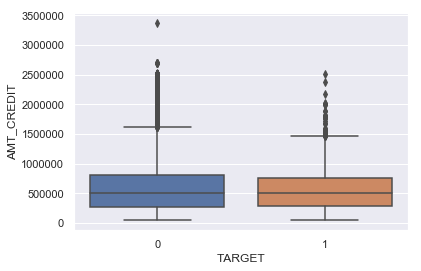

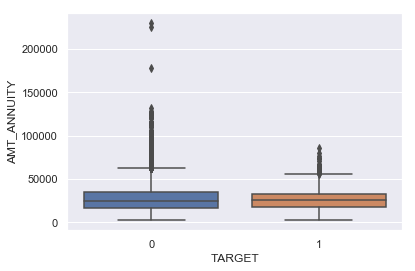

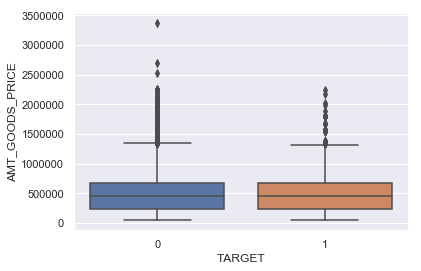

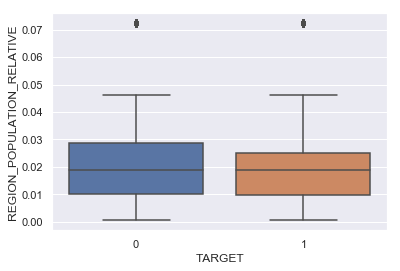

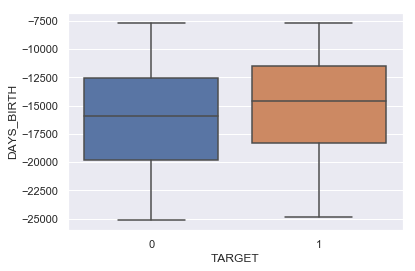

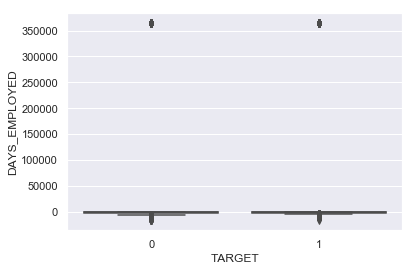

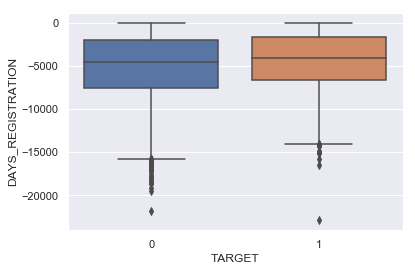

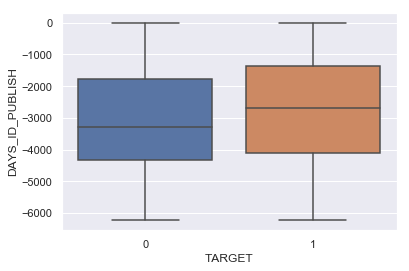

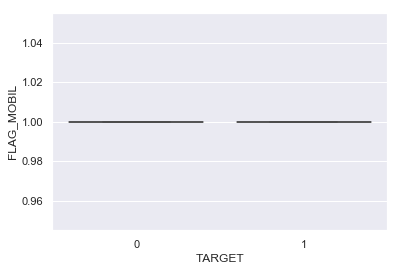

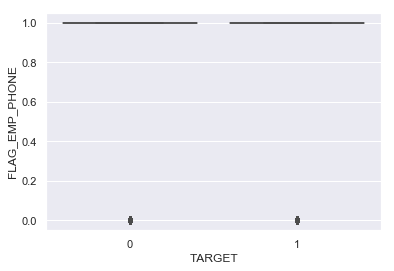

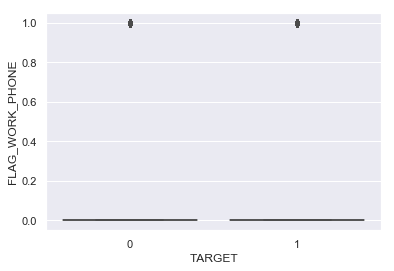

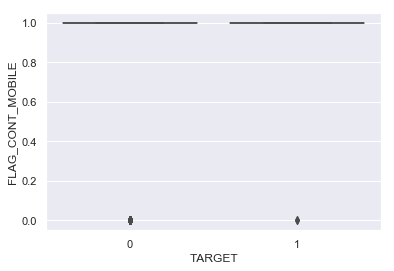

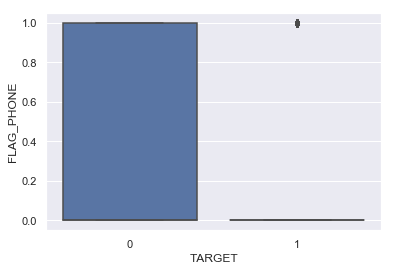

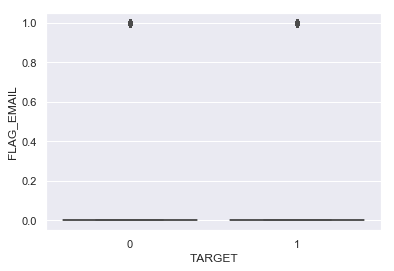

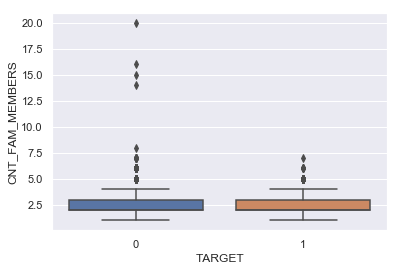

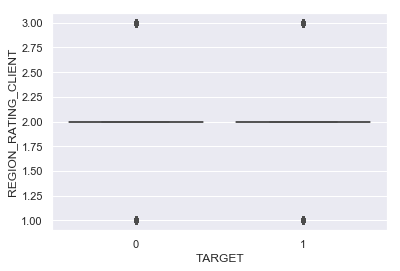

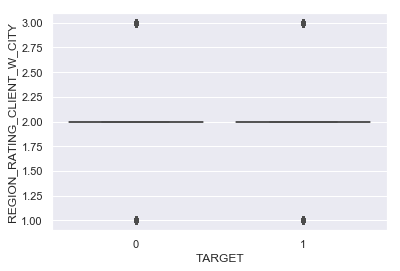

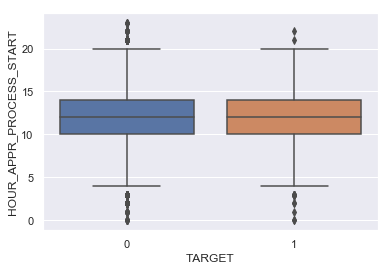

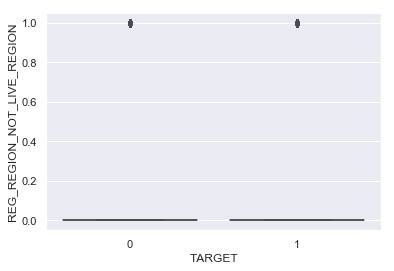

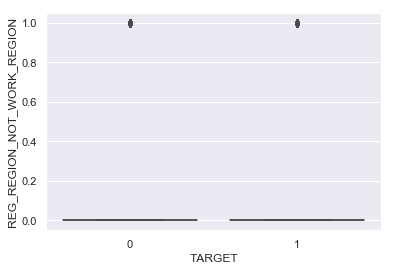

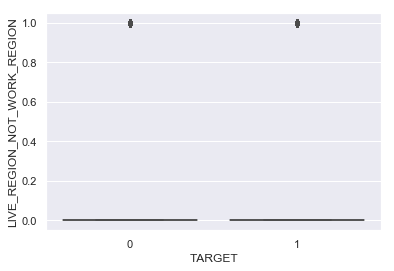

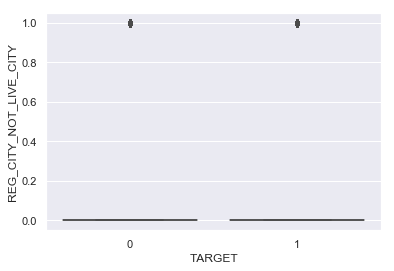

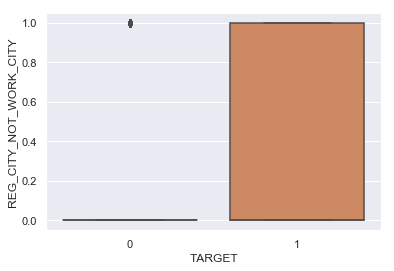

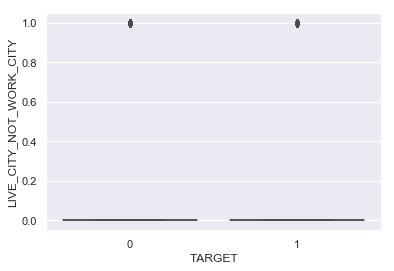

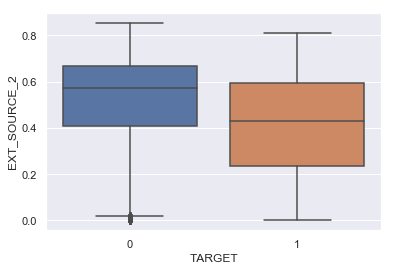

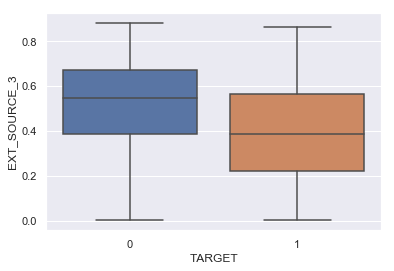

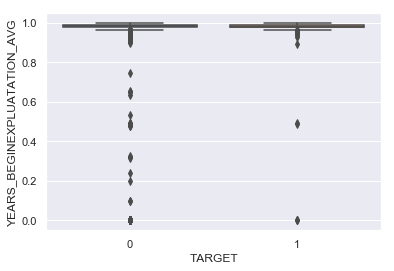

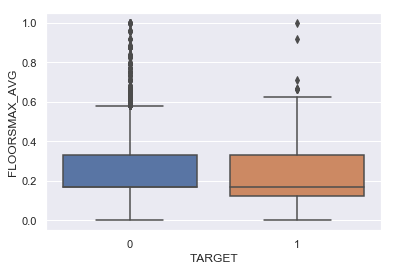

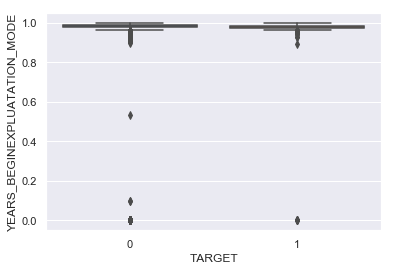

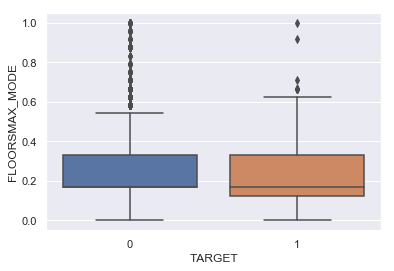

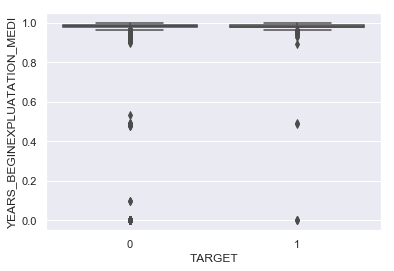

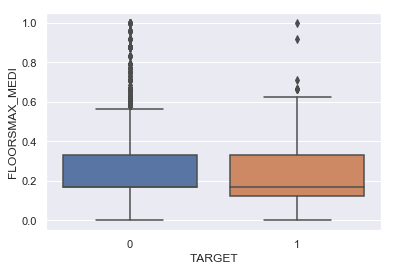

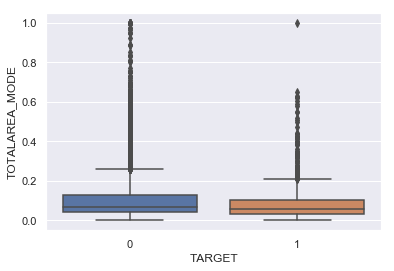

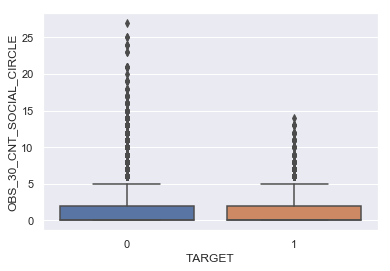

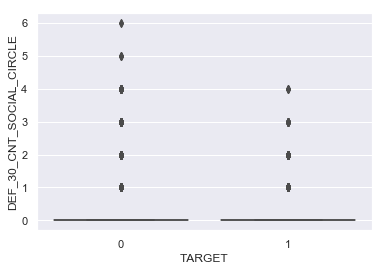

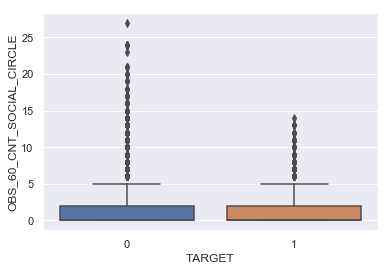

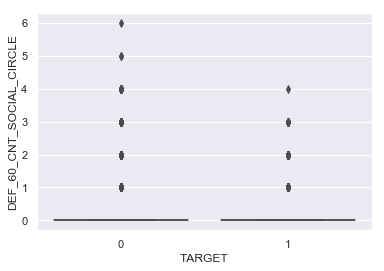

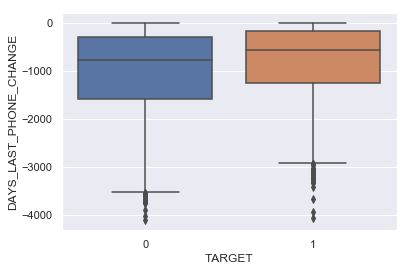

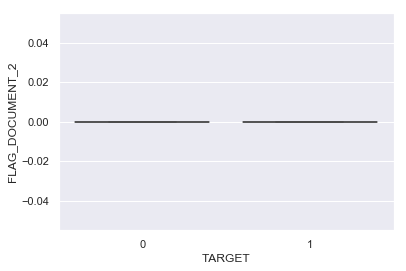

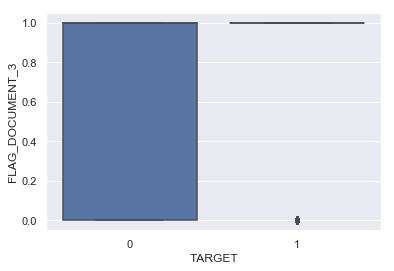

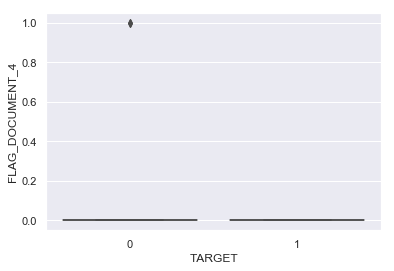

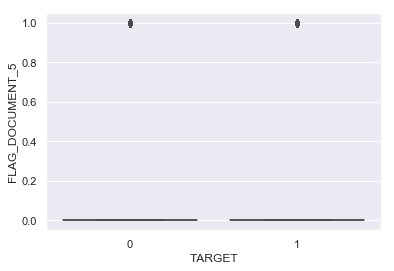

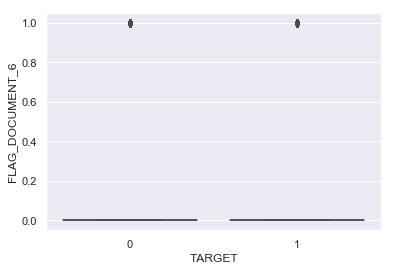

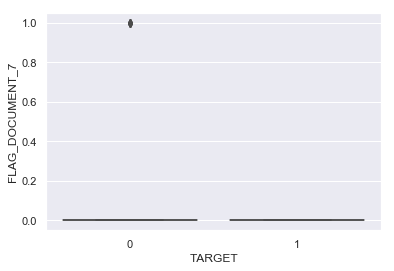

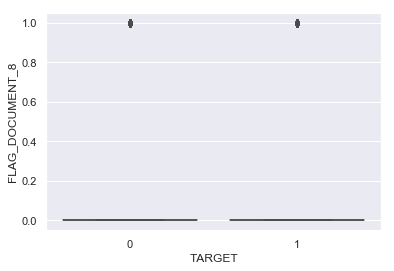

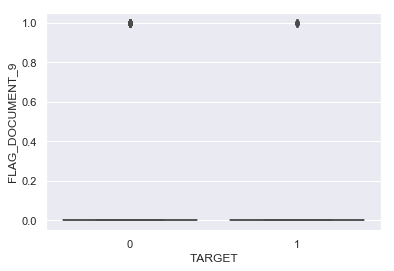

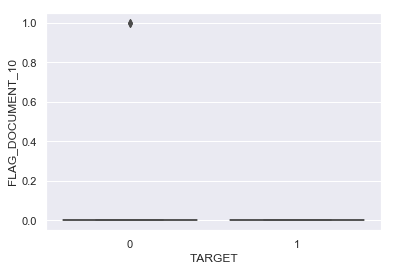

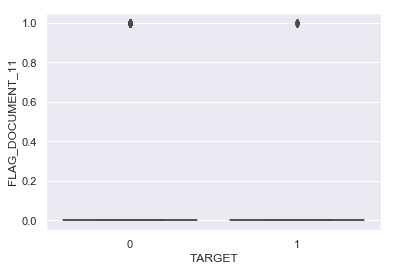

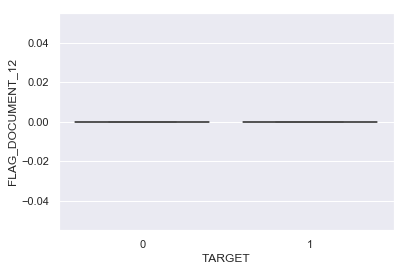

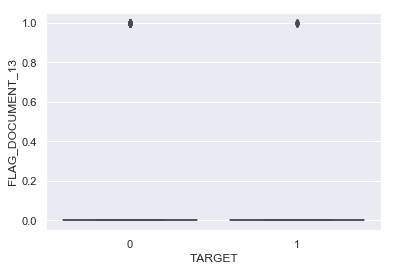

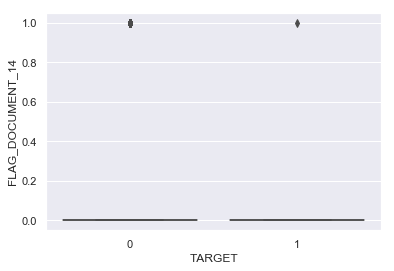

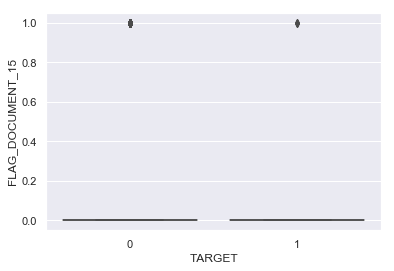

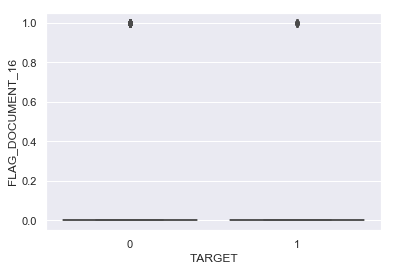

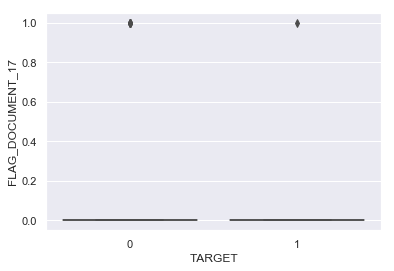

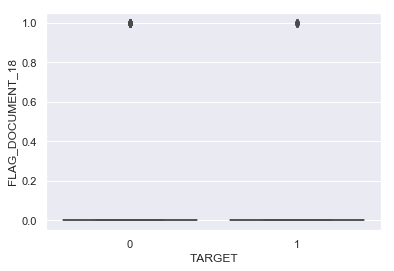

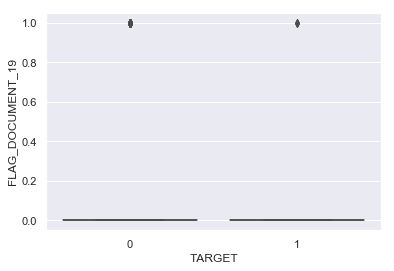

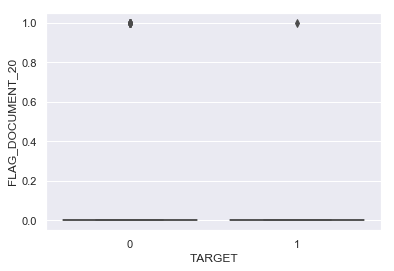

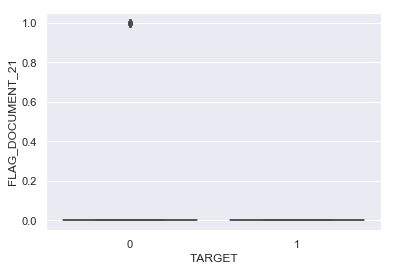

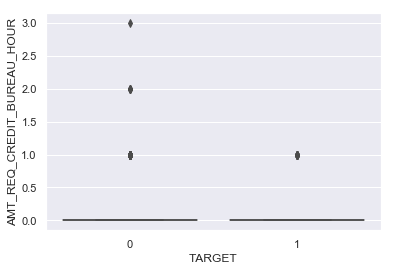

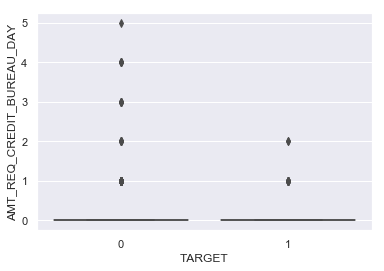

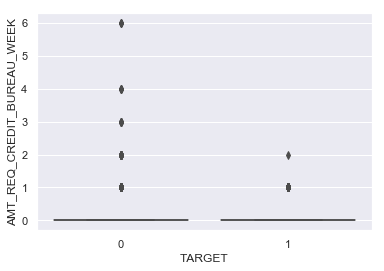

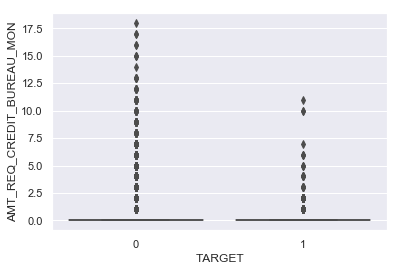

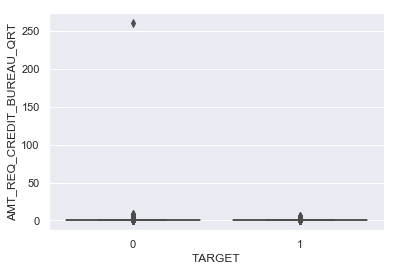

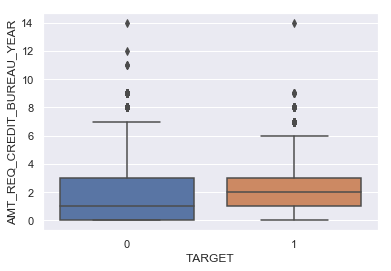

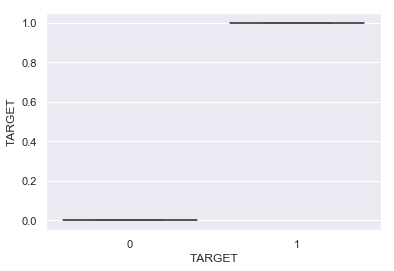

In [95]:
for features in numeric:
    sns.boxplot(x='TARGET', y=train[features], data=train)
    plt.show()

### Correlation

In [96]:
train.corr()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                      1.000000      0.000212          0.004850   
CNT_CHILDREN                    0.000212      1.000000          0.029512   
AMT_INCOME_TOTAL                0.004850      0.029512          1.000000   
AMT_CREDIT                     -0.010835     -0.007165          0.367418   
AMT_ANNUITY                    -0.008270      0.010982          0.451746   
AMT_GOODS_PRICE                -0.012292     -0.009993          0.375368   
REGION_POPULATION_RELATIVE      0.007052     -0.024609          0.166889   
DAYS_BIRTH                      0.007005      0.329278          0.065188   
DAYS_EMPLOYED                  -0.002140     -0.234697         -0.152907   
DAYS_REGISTRATION               0.002404      0.176183          0.063933   
DAYS_ID_PUBLISH                 0.002060     -0.032125          0.024744   
FLAG_MOBIL                           NaN           NaN               NaN   
FLAG_EMP_PHONE                  0.002392      0.235443          0.152377   
FLAG_WORK_PHONE                -0.008043      0.057629         -0.032466   
FLAG_CONT_MOBILE                0.000153     -0.002936         -0.011724   
FLAG_PHONE                     -0.004948     -0.028250          0.006407   
FLAG_EMAIL                      0.007515      0.020565          0.092638   
CNT_FAM_MEMBERS                -0.005265      0.881732          0.035612   
REGION_RATING_CLIENT            0.003447      0.030916         -0.199442   
REGION_RATING_CLIENT_W_CITY     0.002879      0.028259         -0.215173   
HOUR_APPR_PROCESS_START         0.000048     -0.006946          0.071996   
REG_REGION_NOT_LIVE_REGION     -0.005324     -0.013912          0.070843   
REG_REGION_NOT_WORK_REGION     -0.000245     -0.000865          0.139457   
LIVE_REGION_NOT_WORK_REGION     0.005931      0.008016          0.129205   
REG_CITY_NOT_LIVE_CITY          0.001480      0.023393          0.016284   
REG_CITY_NOT_WORK_CITY          0.005833      0.067980          0.018306   
LIVE_CITY_NOT_WORK_CITY         0.006204      0.063641          0.018635   
EXT_SOURCE_2                   -0.000949     -0.026912          0.144008   
EXT_SOURCE_3                   -0.003203     -0.036714         -0.068591   
YEARS_BEGINEXPLUATATION_AVG    -0.001358      0.005195          0.022684   
FLOORSMAX_AVG                   0.001716     -0.016034          0.180753   
YEARS_BEGINEXPLUATATION_MODE   -0.000757      0.003736          0.023007   
FLOORSMAX_MODE                  0.002696     -0.016019          0.176280   
YEARS_BEGINEXPLUATATION_MEDI   -0.002304      0.004503          0.022080   
FLOORSMAX_MEDI                  0.001862     -0.016018          0.180539   
TOTALAREA_MODE                 -0.007180     -0.005356          0.122042   
OBS_30_CNT_SOCIAL_CIRCLE       -0.004249      0.025031         -0.026510   
DEF_30_CNT_SOCIAL_CIRCLE       -0.007117      0.010316         -0.032440   
OBS_60_CNT_SOCIAL_CIRCLE       -0.004657      0.024096         -0.026365   
DEF_60_CNT_SOCIAL_CIRCLE       -0.003297      0.010114         -0.030634   
DAYS_LAST_PHONE_CHANGE          0.004697      0.001749         -0.045618   
FLAG_DOCUMENT_2                      NaN           NaN               NaN   
FLAG_DOCUMENT_3                 0.000927      0.055429         -0.038512   
FLAG_DOCUMENT_4                -0.010423     -0.004576         -0.007894   
FLAG_DOCUMENT_5                 0.004387     -0.015999          0.011734   
FLAG_DOCUMENT_6                -0.005586     -0.154817         -0.114733   
FLAG_DOCUMENT_7                -0.006813      0.000578          0.027338   
FLAG_DOCUMENT_8                 0.002393      0.049209          0.178217   
FLAG_DOCUMENT_9                 0.001703     -0.000307          0.030735   
FLAG_DOCUMENT_10               -0.001364     -0.004576          0.000037   
FLAG_DOCUMENT_11               -0.011154     -0.012394         -0.010640   
FLAG_DOCUMENT_12                     NaN           NaN               NaN   
FL

In [97]:
categoric = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 
             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
             'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']

In [98]:
from jcopml.plot import plot_correlation_ratio, plot_association_matrix

In [99]:
plot_association_matrix(train, 'TARGET', categoric)

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

In [100]:
numeric = ['SK_ID_CURR', 'CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
           'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
           'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
           'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
           'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI',
           'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
           'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
           'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
           'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
           'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
TARGET    0.000023      0.000182           0.00046    0.000715     0.000178   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
TARGET         0.001337                    0.001087    0.004696   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
TARGET       0.002105           0.001556         0.004019         0.0   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
TARGET        0.002197          0.00053          0.000064    0.000857   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
TARGET    0.000133         0.000036              0.003492   

        REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
TARGET                     0.003255                 0.000621   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
TARGET                    0.000028                    0.000094   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
TARGET                     0.000084                0.001133   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
TARGET                0.002585                 0.001419      0.026183   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
TARGET      0.030052                     0.000025       0.002122   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
TARGET                      0.000042        0.002162   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
TARGET                      0.000026        0.002118        0.001403   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
TARGET                  0.000051                  0.001489   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
TARGET                  0.000051                  0.001099   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
TARGET                 0.00377              0.0         0.001946   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
TARGET         0.000006     3.106731e-07         0.001084         0.000026   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
TARGET         0.000008         0.000014          0.000006          0.000012   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
TARGET               0.0          0.000113          0.000169   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
TARGET      5.372839e-08          0.000178          0.000002   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
TARGET          0.000069      3.893627e-07          0.000001   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
TARGET          0.000037                2.007501e-07   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
TARGET                   0.000001                    0.000002   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
TARGET                   0.000281               4.735945e-09   

        AMT_REQ_CREDIT_BUREAU_YEAR  
TARGET                    0.000411

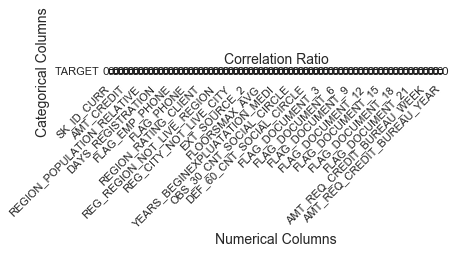

In [101]:
plot_correlation_ratio(train, ['TARGET'], numeric, report=True)

## Dataset Splitting

In [102]:
X = train.drop(columns="TARGET")
y = train.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24601, 80), (6151, 80), (24601,), (6151,))

## Modeling

In [104]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp
from jcopml.tuning.space import Integer, Real
from sklearn.impute import SimpleImputer

### Logistic Regression

In [105]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), numeric),
    ('categoric', cat_pipe(encoder='onehot'), categoric),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(n_jobs=-2, random_state=42))
])

params = {'algo__fit_intercept': [True, False],
          'algo__C': [0.01, 0.1, 1, 10, 100]}

model = RandomizedSearchCV(pipeline, params, cv=3, scoring='f1', n_iter=10, n_jobs=-2, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'algo__fit_intercept': False, 'algo__C': 100}
0.024473813020068527 0.029065850706739824 0.02348336594911937


### XGBoost

In [106]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), numeric),
    ('categoric', cat_pipe(encoder='onehot'), categoric),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(n_jobs=-2, random_state=42, verbosity=0))
])

params = {'algo__max_depth': Integer(low=1, high=10),
          'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
          'algo__n_estimators': Integer(low=100, high=200),
          'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
          'algo__gamma': Integer(low=1, high=10),
          'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
          'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
          'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

model_2 = RandomizedSearchCV(pipeline, params, cv=3, scoring='f1', n_iter=25, n_jobs=-2, verbose=1, random_state=42)
model_2.fit(X_train, y_train)

print(model_2.best_params_)
print(model_2.score(X_train, y_train), model_2.best_score_, model_2.score(X_test, y_test))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
{'algo__colsample_bytree': 0.6439756413500356, 'algo__gamma': 4, 'algo__learning_rate': 0.7686119654652775, 'algo__max_depth': 7, 'algo__n_estimators': 158, 'algo__reg_alpha': 0.601367193359287, 'algo__reg_lambda': 3.325610295975196, 'algo__subsample': 0.6121770240668967}
0.7882869692532943 0.1484152959910833 0.1278772378516624


In [107]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix

In [108]:
plot_classification_report(X_train, y_train, X_test, y_test, model_2, report=True)

Train report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22615
           1       0.94      0.68      0.79      1986

    accuracy                           0.97     24601
   macro avg       0.96      0.84      0.89     24601
weighted avg       0.97      0.97      0.97     24601


Test report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5654
           1       0.18      0.10      0.13       497

    accuracy                           0.89      6151
   macro avg       0.55      0.53      0.53      6151
weighted avg       0.86      0.89      0.88      6151



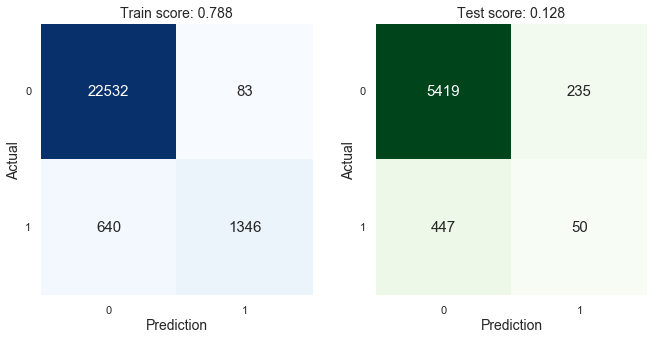

In [109]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)